In [1]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"bnc_initialize.jl")
Threads.nthreads() # check number of threads

  Activating project at `~/Realizibility_index/bnc_julia`


24

In [100]:
q_sym = [:qE, :qS]
K_sym1 = [:K₁, :K₂]
K_sym2 = [:K_S, :K_E]
x_sym1 = [:E, :S, :C₁, :C₂]
x_sym2 = [:E, :S, :C_S, :C₂]
N1 =     [1  1  -1  0;
           0  1  1  -1]
N2 =     [0  2  -1  0;
           1  0  1  -1]
model1 = Bnc(N=N1, x_sym=x_sym1, q_sym=q_sym, K_sym=K_sym1)
model2 = Bnc(N=N2, x_sym=x_sym2, q_sym=q_sym, K_sym=K_sym2)

find_all_vertices!(model1)
find_all_vertices!(model2)
summary(model1)
summary(model2)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 8 vertices found and 7 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 6 vertices found and 6 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 4
Number of conserved quantities (d): 2
Number of reactions (r): 2
L matrix: [1 0 1 1; 0 1 1 2]
N matrix: [1 1 -1 0; 0 1 1 -1]
Direction of binding reactions: forward
Cataly

In [283]:
show_conservation(model2)

2-element Vector{Equation}:
 qE ~ C₂ + E
 qS ~ 2C_S + 2C₂ + S

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 5
[ Info: All regimes converged after 2400000 samples.
[ Info: Total samples: 2400000, Elapsed: 0.69 s


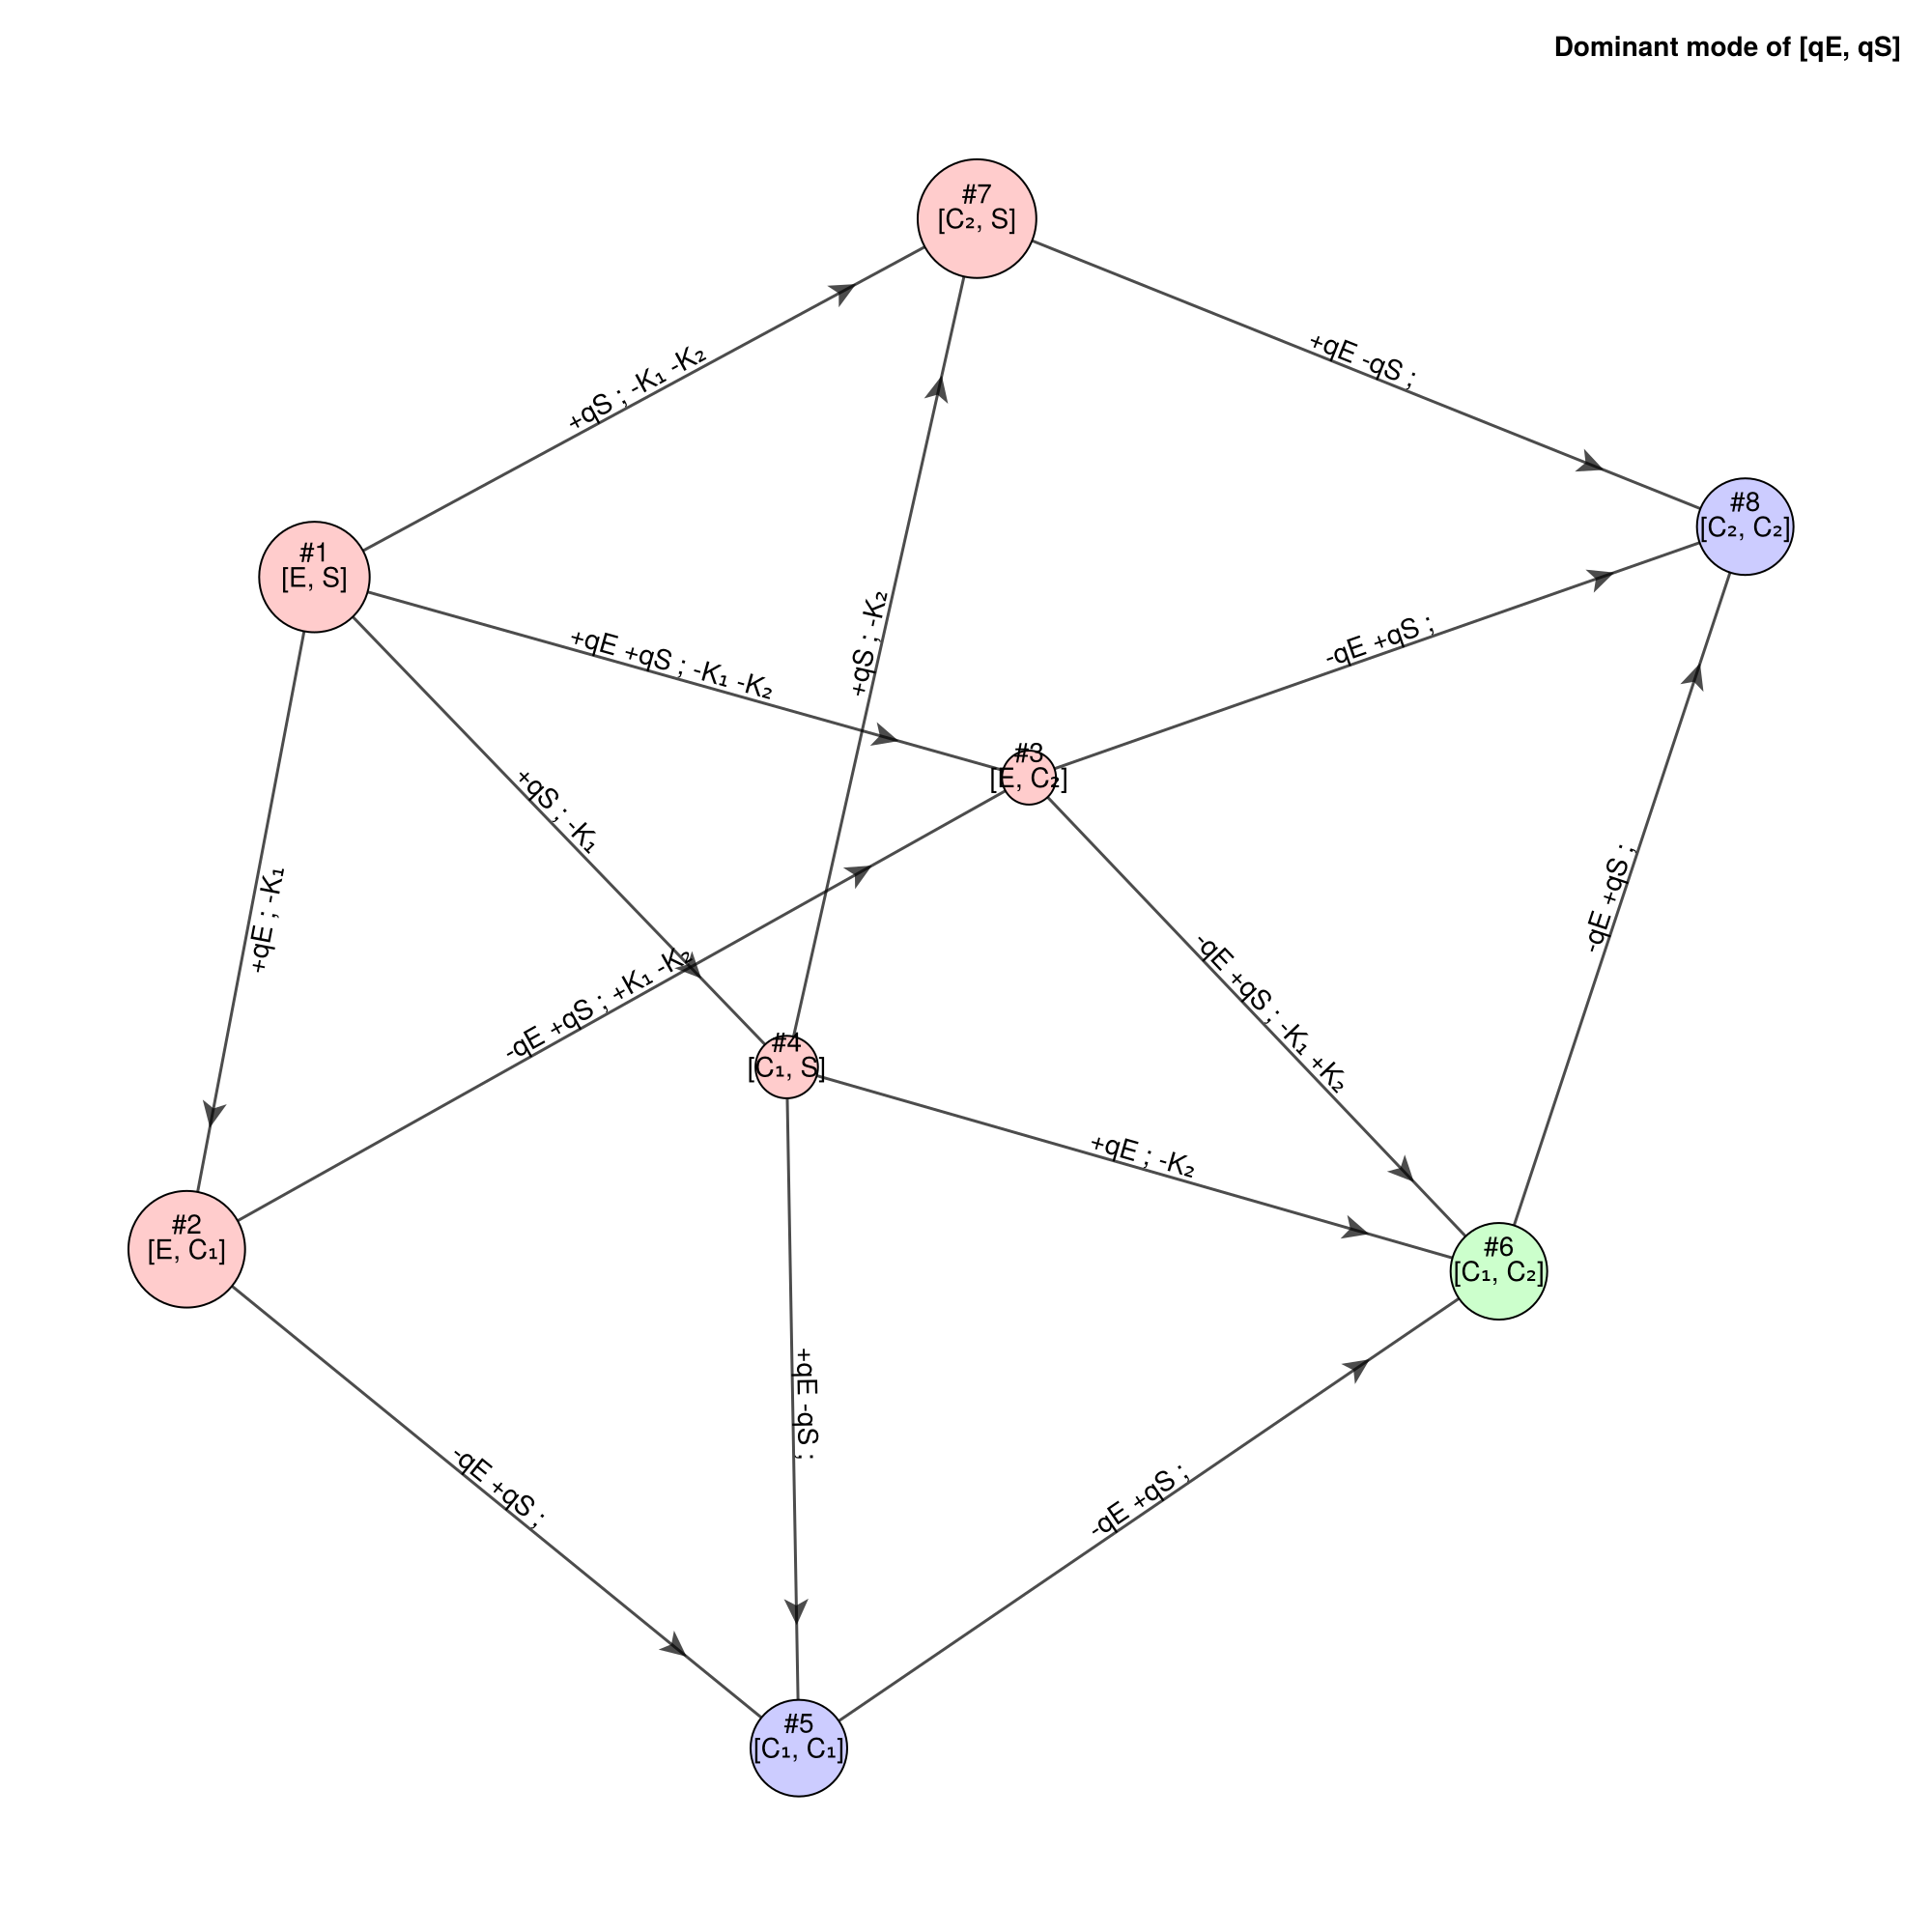

CairoMakie.Screen{IMAGE}


In [7]:
f,ax,p = draw_vertices_neighbor_graph(model1)
add_vertices_idx!(ax,p)
display(f)

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 5
[ Info: All regimes converged after 2800000 samples.
[ Info: Total samples: 2800000, Elapsed: 0.79 s


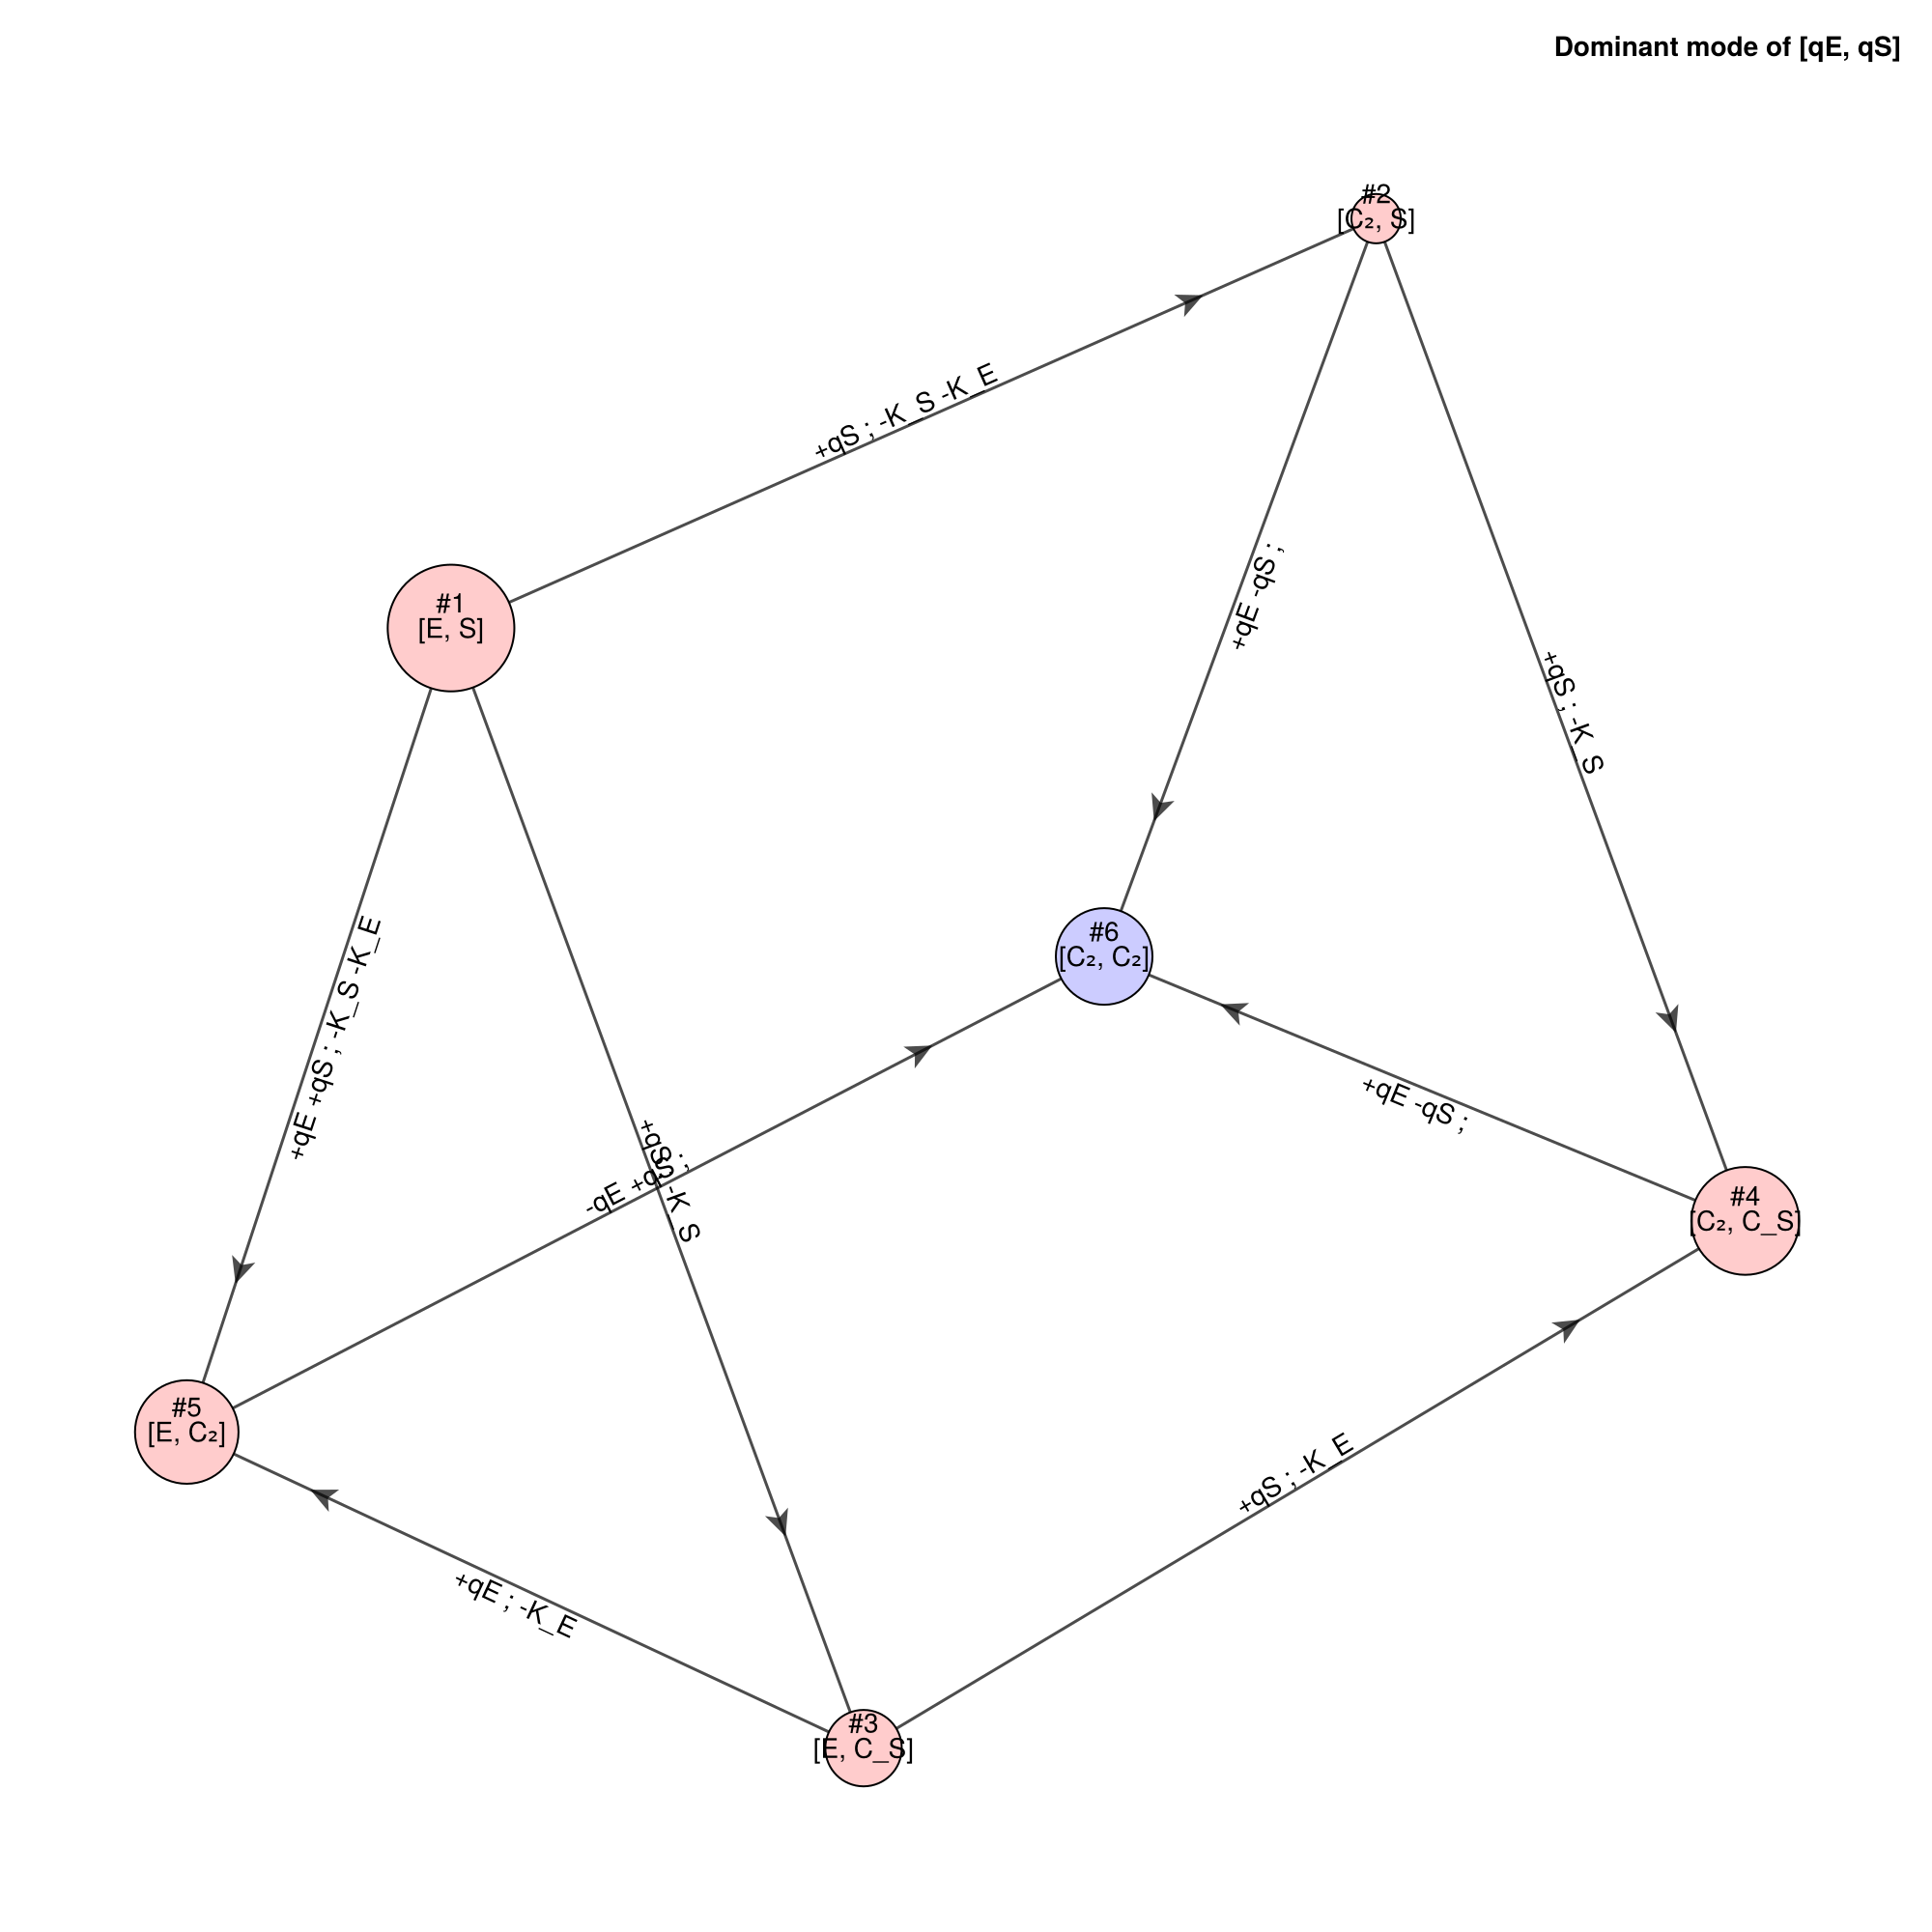

CairoMakie.Screen{IMAGE}


In [8]:
f,ax,p = draw_vertices_neighbor_graph(model2)
add_vertices_idx!(ax,p)
display(f)

In [101]:
grh1 = SISO_graph(model1, :qS)
grh2 = SISO_graph(model2, :qS)

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: sources: [2, 1]
[ Info: sinks: [7]
[ Info: sources: [1]
[ Info: sinks: [4]


SISO_graph{Int8}(Bnc{Int8}([0 2 -1 0; 1 0 1 -1], [1 0 0 1; 0 1 2 2], 2, 4, 2, Num[E, S, C_S, C₂], Num[qE, qS], Num[K_S, K_E], nothing, Vector{Int8}[[1, 2], [4, 2], [1, 3], [4, 3], [1, 4], [4, 4]], Dict{Vector{Int8}, Int64}([4, 2] => 2, [1, 3] => 3, [1, 4] => 5, [1, 2] => 1, [4, 3] => 4, [4, 4] => 6), Bool[1, 1, 1, 1, 1, 1], Int8[0, 0, 0, 0, 0, 1], VertexGraph{Int8}(SimpleGraph{Int64}(9, [[2, 3, 5], [1, 4, 6], [1, 4, 5], [2, 3, 6], [1, 3, 6], [2, 4, 5]]), Vector{VertexEdge{Int8}}[[VertexEdge{Int8}(2, 1, sparsevec(Int8[1, 4], Int8[-1, 1], 4), sparsevec(Int8[2, 3, 4], [2.0, -1.0, -1.0], 4)), VertexEdge{Int8}(3, 2, sparsevec(Int8[2, 3], Int8[-1, 1], 4), sparsevec(Int8[2, 3], [1.0, -1.0], 4)), VertexEdge{Int8}(5, 2, sparsevec(Int8[2, 4], Int8[-1, 1], 4), sparsevec(Int8[1, 2, 3, 4], [1.0, 1.0, -1.0, -1.0], 4))], [VertexEdge{Int8}(4, 2, sparsevec(Int8[2, 3], Int8[-1, 1], 4), sparsevec(Int8[2, 3], [1.0, -1.0], 4)), VertexEdge{Int8}(6, 2, sparsevec(Int8[2, 4], Int8[-1, 1], 4), sparsevec(Int8[1,

In [102]:
summary_path(grh2, :C₂;deduplicate=true, keep_singular=false, keep_nonasymptotic=false)  |> render_path

[ Info: Number of polyhedra to calc volume: 4


Path [2, 3, 4]        2 → 1 → 0                     	  Volume: 0.7486 ± 0.0033
Path [1]              2 → 0                         	  Volume: 0.251  ± 0.0012


[ Info: All regimes converged after 1700000 samples.
[ Info: Total samples: 1700000, Elapsed: 0.31 s


In [13]:
isa(NaN, Float64)

true

In [103]:
summary_path(grh1, :C₂;deduplicate=true, keep_singular=false, keep_nonasymptotic=false)  |> render_path

[ Info: Number of polyhedra to calc volume: 6


Path [1, 2, 3, 5, 6, 7]  2 → 1 → 0                     	  Volume: 0.5826 ± 0.0029
Path [4, 8]           2 → 0                         	  Volume: 0.4172 ± 0.002 


[ Info: All regimes converged after 1700000 samples.
[ Info: Total samples: 1700000, Elapsed: 0.18 s


In [115]:
a,b = get_expression_for_path(grh1,8, :C₂)
display.(a)
println("-"^100)
display.(b)

(K₁*(qS^2.0)) / (K₂*qE)

0.5qS

qE

----------------------------------------------------------------------------------------------------


qE

2.0qE

2-element Vector{Nothing}:
 nothing
 nothing

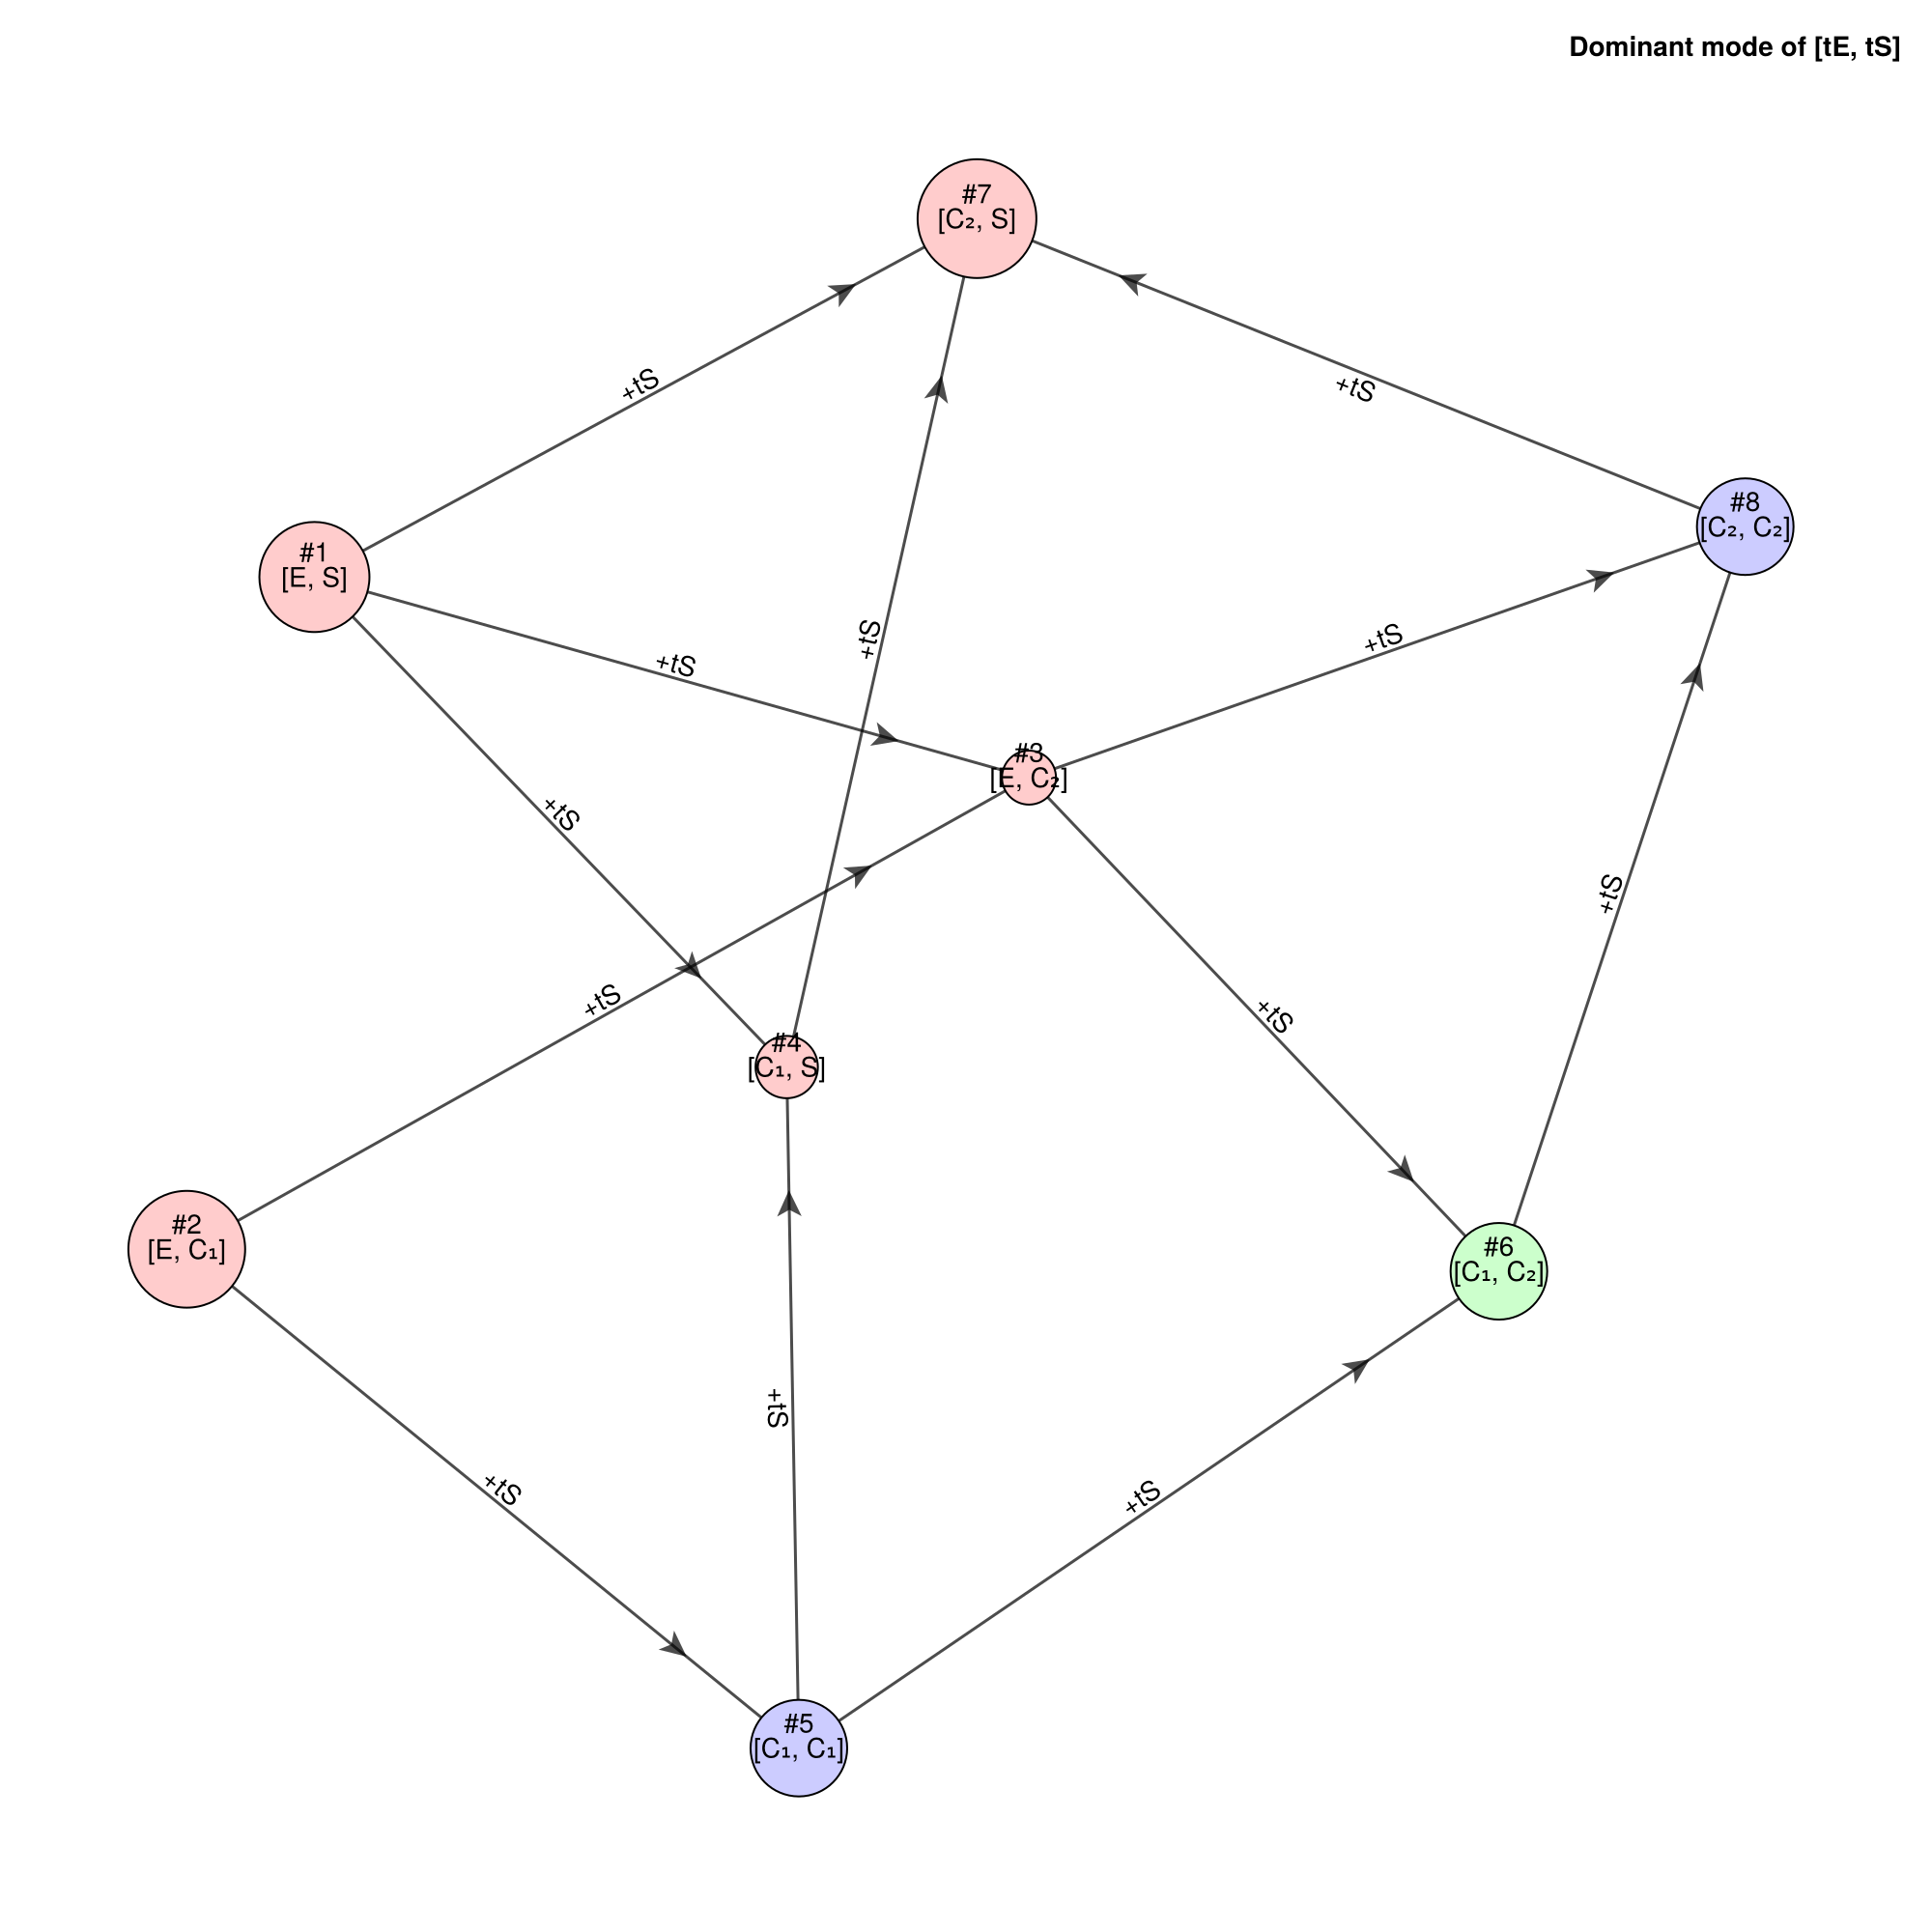

CairoMakie.Screen{IMAGE}


In [129]:
f,ax,p = draw_vertices_neighbor_graph(grh1)
add_vertices_idx!(ax,p)
display(f)

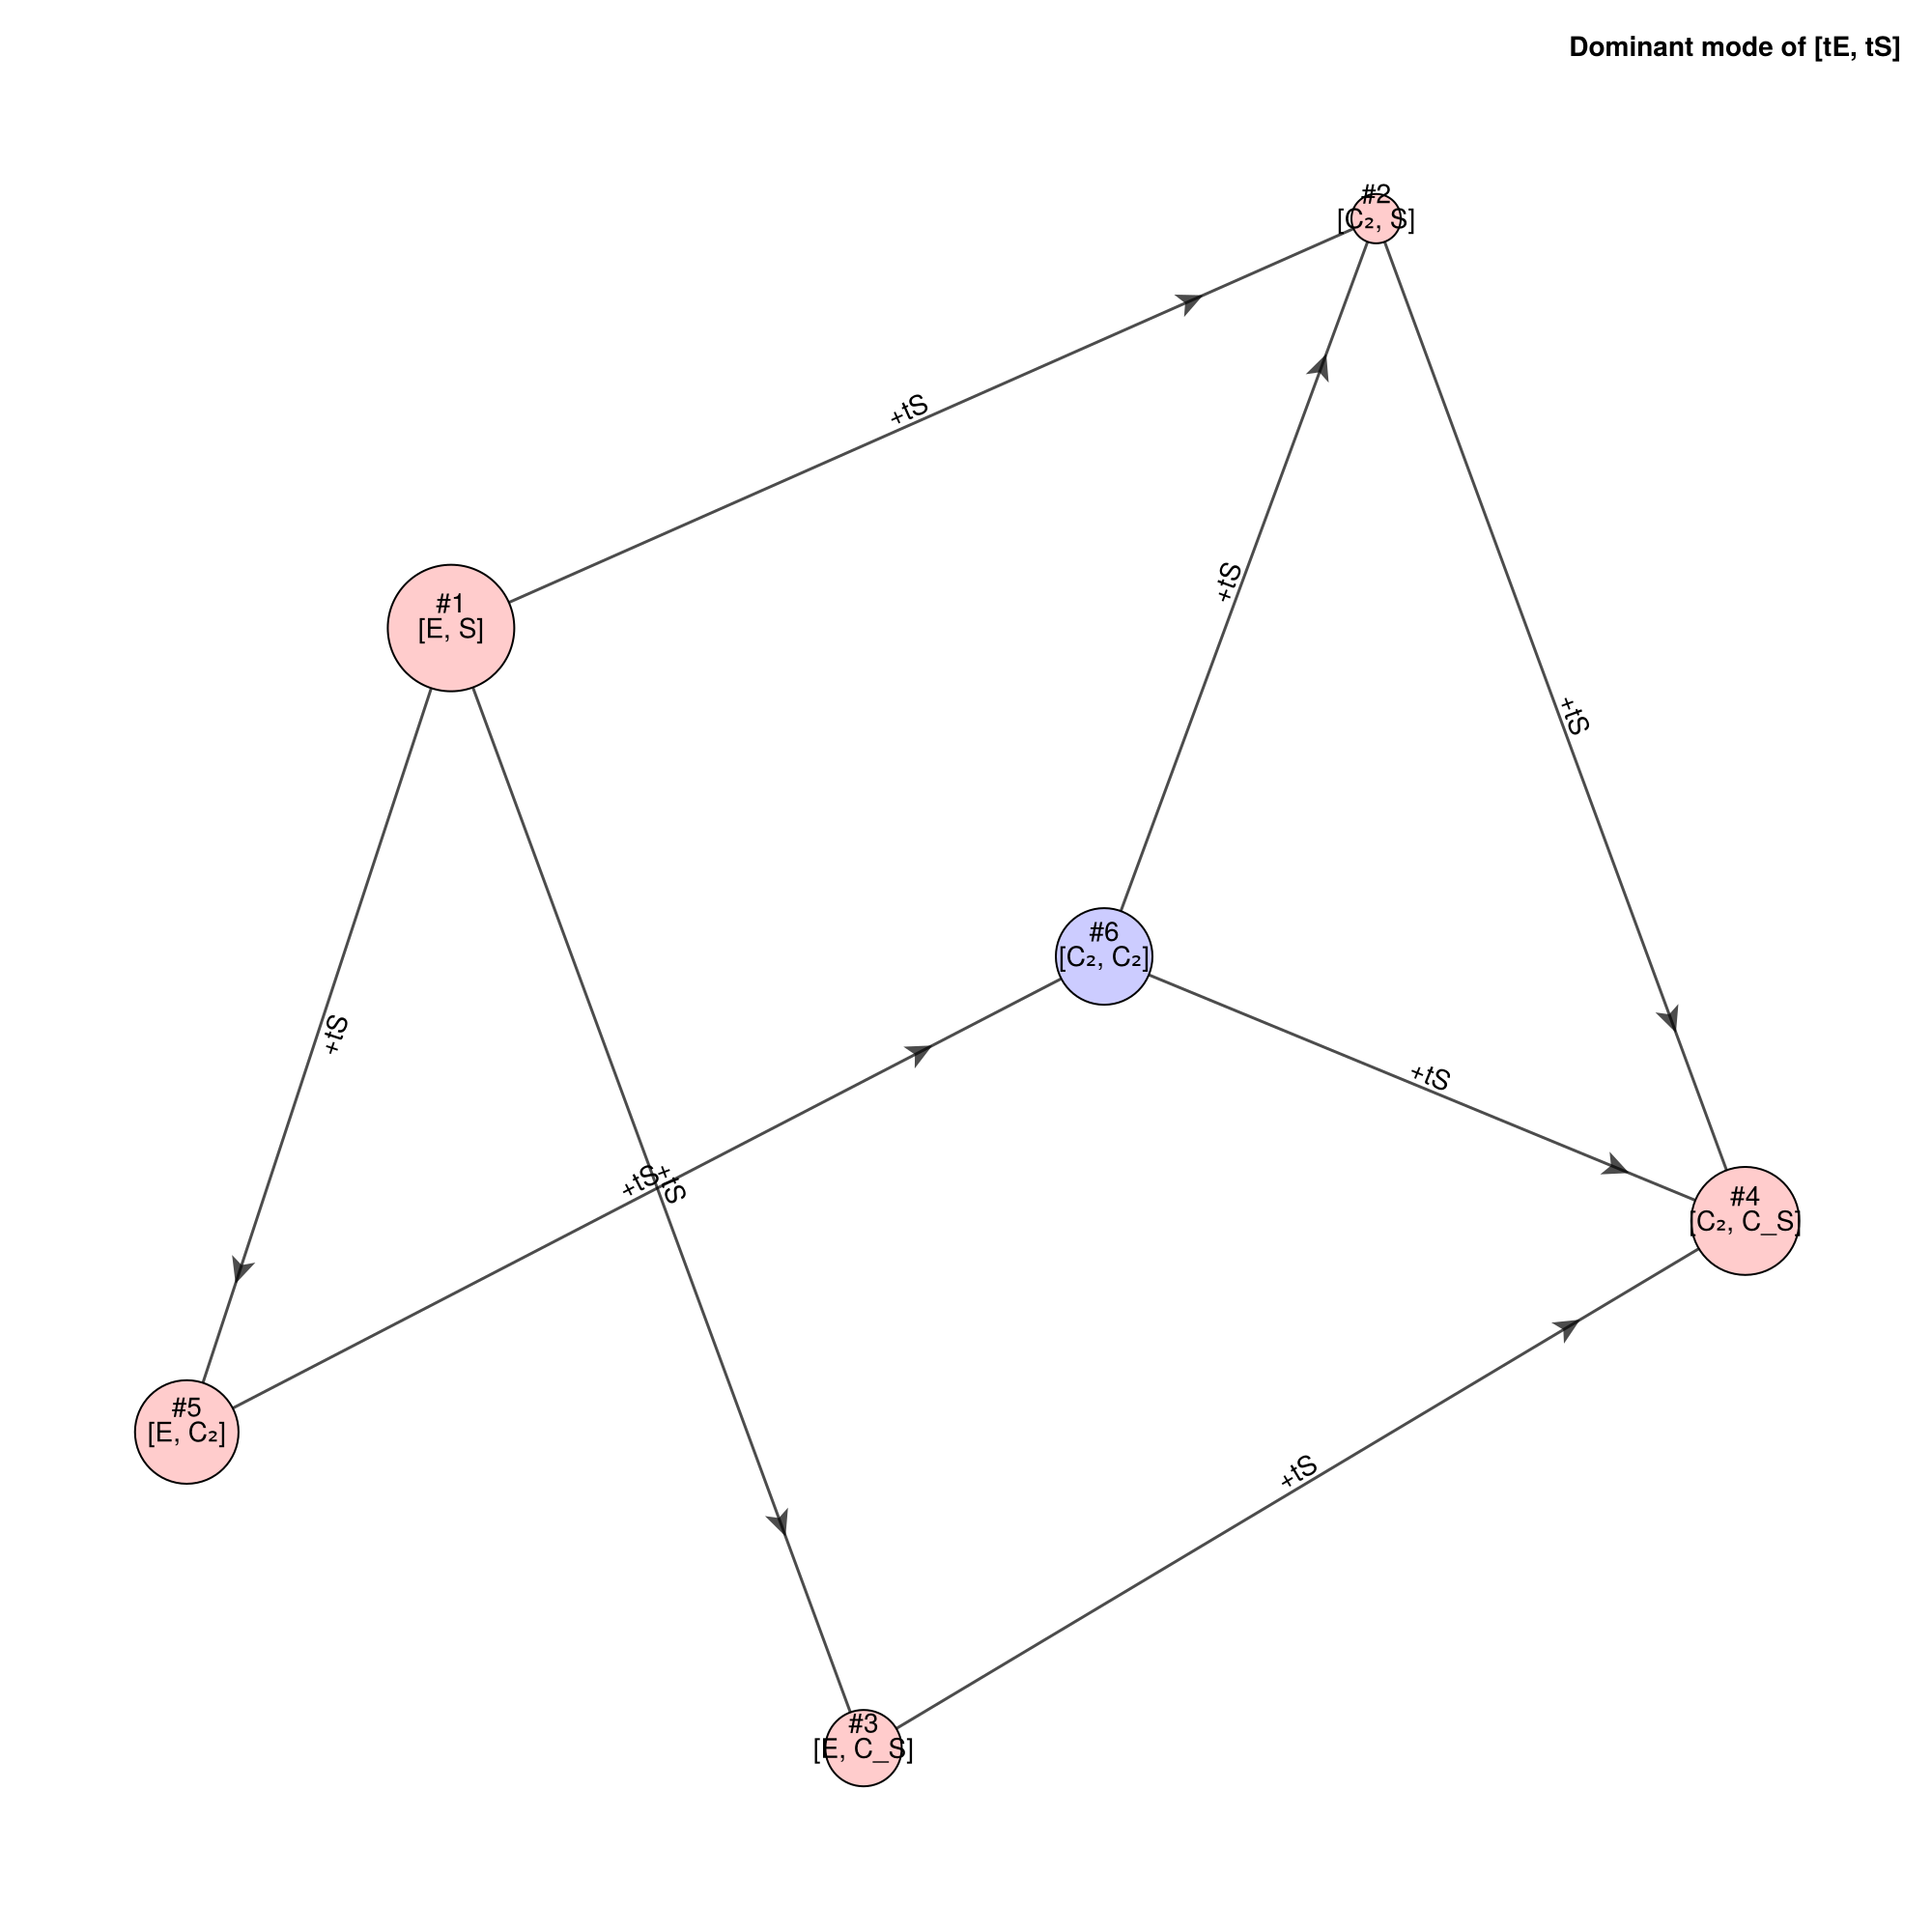

CairoMakie.Screen{IMAGE}


In [130]:
f,ax,p = draw_vertices_neighbor_graph(grh2)
add_vertices_idx!(ax,p)
display(f)

In [25]:
render_path(groups::AbstractVector{AbstractVector{<:Real}}; kwargs...) = render_path(eachindex(pths), pths, nothing; kwargs...)

render_path (generic function with 6 methods)

In [87]:
find_reaction_order_for_path(grh1,:C₂;keep_singular=true,keep_nonasymptotic=true) |> render_path

Path 1          : 1 → 0 → -1 → -0.5                       
Path 2          : 1 → 0 → 0 → -0.5                        
Path 3          : 1 → -1 → -0.5                           
Path 4          : 1 → 0.5 → 0 → -0.5                      
Path 5          : 1 → 0.5 → -0.5                          
Path 6          : 1 → 0.5 → 0 → 0 → -0.5                  
Path 7          : 1 → 0.5 → 0 → -Inf → -1 → -0.5          
Path 8          : 1 → 0.5 → 0 → -Inf → -0.5               
Path 9          : 1 → 0.5 → -Inf → -1 → -0.5              
Path 10         : 1 → 0.5 → -Inf → -0.5                   
Path 11         : 1 → 0.5 → 0 → -0.5                      
Path 12         : 1 → 0.5 → -0.5                          
Path 13         : 1 → NaN → 0 → -1 → -0.5                 
Path 14         : 1 → NaN → 0 → 0 → -0.5                  
Path 15         : 1 → NaN → 0 → -0.5                      
Path 16         : 1 → NaN → 0 → 0 → -0.5                  
Path 17         : 1 → NaN → 0 → -Inf → -1 → -0.5        

In [99]:
summary_path(grh1, :C₃,deduplicate=true,keep_nonasymptotic=false,keep_singular=false) |> render_path

Path [1, 5, 7, 8, 9, 10, 12, 13, 20, 21, 22, 23]  2 → 1 → 0                     	  Volume: 0.4479 ± 0.0022
Path [2, 4, 6, 11, 14, 19]  2 → 1 → 0.5 → 0               	  Volume: 0.2498 ± 0.0012
Path [3, 17, 18]      2 → 0                         	  Volume: 0.1668 ± 0.0008
Path [15, 16]         2 → 0.5 → 0                   	  Volume: 0.1351 ± 0.0007


In [97]:
show_path(grh1)

Path 1                #1 → #2 → #3 → #6             	  Volume: 0.0314 ± 0.0002
Path 2                #1 → #2 → #5 → #6             	  Volume: 0.0834 ± 0.0004
Path 3                #1 → #3 → #6                  	  Volume: 0.1041 ± 0.0005
Path 4                #1 → #4 → #5 → #6             	  Volume: 0.0312 ± 0.0002
Path 5                #1 → #4 → #6                  	  Volume: 0.1347 ± 0.0007
Path 6                #1 → #9 → #10 → #5 → #6       	  Volume: 0.0    ± 0.0   
Path 7                #1 → #9 → #10 → #11 → #3 → #6 	  Volume: 0.0    ± 0.0   
Path 8                #1 → #9 → #10 → #11 → #6      	  Volume: 0.0    ± 0.0   
Path 9                #1 → #9 → #11 → #3 → #6       	  Volume: 0.0313 ± 0.0002
Path 10               #1 → #9 → #11 → #6            	  Volume: 0.0833 ± 0.0004
Path 11               #7 → #4 → #5 → #6             	  Volume: 0.0104 ± 0.0001
Path 12               #7 → #4 → #6                  	  Volume: 0.0104 ± 0.0001
Path 13               #7 → #8 → #2 → #3 → #6        

In [43]:
a,b = get_expression_for_path(grh1,2, :C₂)
display.(a)
display.(b)

(qE*(qS^2.0)) / (K₁*K₂)

0.5qS

qE

(0.5K₁*K₂) / qE

2.0qE

2-element Vector{Nothing}:
 nothing
 nothing

In [44]:
a,b = get_expression_for_path(grh1,6, :C₂)
display.(a)
display.(b)

(K₁*(qS^2.0)) / (K₂*qE)

0.5qS

qE

(0.5K₂*qE) / K₁

2.0qE

2-element Vector{Nothing}:
 nothing
 nothing

In [291]:
show_dominant_condition(model1,7)

2-element Vector{Equation}:
 log10(qE) ~ log10(C₂)
 log10(qS) ~ log10(S)

In [299]:
show_condition_qK(model1,7,log_space=false)

4-element Vector{Num}:
 (qS^2.0) > (K₁*K₂)
            qS > K₂
 (qS^2.0) > (K₂*qE)
       (0.5qS) > qE

In [307]:
get_volume!(model1,7,recalculate=true, rel_tol=0.001)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 8900000 samples.
[ Info: Total samples: 8900000, Elapsed: 0.82 s


(0.30215828764053837, 0.0003016815108988152)

Set{Int64} with 2 elements:
  2
  1

In [61]:
show_condition_path(g2,4;log_space=false)

3-element Vector{Num}:
      K₂ > qS
      qS > K₁
 (2.0K₁) > K₂

In [308]:
show_condition_path(grh1,4;log_space=false)

2-element Vector{Num}:
                K₁ > K₂
 (0.25K₁*K₂) > (qE^2.0)

In [295]:
(expr, bounds) = get_expression_for_path(grh1, 4, :C₂; log_space=false)
expr .|> display
println("----------")
bounds .|> display

(qE*(qS^2.0)) / (K₁*K₂)

qE

----------


(K₁^0.5)*(K₂^0.5)

1-element Vector{Nothing}:
 nothing

In [134]:
show_condition_qK(model1,1;log_space=false)

4-element Vector{Num}:
              K₁ > tS
   (K₁*K₂) > (tS^2.0)
              K₁ > tE
 (0.5K₁*K₂) > (tE*tS)

In [135]:
show_condition_qK(model1,7;log_space=false)

4-element Vector{Num}:
 (tS^2.0) > (K₁*K₂)
            tS > K₂
 (tS^2.0) > (K₂*tE)
       (0.5tS) > tE

In [136]:
get_volume!(model1,1)[1] + get_volume!(model1,7)[1]

0.5619507451536807

In [311]:
calc_volume(grh1.rgm_polys[4], rel_tol=0.001,asymptotic=true)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 11600000 samples.
[ Info: Total samples: 11600000, Elapsed: 0.89 s


(0.2500018931342614, 0.00024918433265469)

In [137]:
grh1.rgm_volume[4]

0.24993792120635658

In [138]:
show_condition_path(grh1, 4;log_space=false)

2-element Vector{Num}:
                K₁ > K₂
 (0.25K₁*K₂) > (tE^2.0)

In [139]:
polyhe = intersect(get_polyhedra(model1,1), get_polyhedra(model1,7))
polyhe2 = eliminate(polyhe, BitSet(2))
detecthlinearity!(polyhe2)
removevredundancy!(polyhe2)

show_condition_poly(polyhe2, [model1.q_sym; model1.K_sym]|> x-> deleteat!(x, 2); log_space=false)

12-element Vector{Num}:
                 (0.5K₁) > tE
           (K₁^2.0) > (K₂*tE)
                      K₁ > K₂
                      K₁ > K₂
                      K₁ > K₂
                      K₁ > tE
       (0.25K₁*K₂) > (tE^2.0)
       (0.25K₁*K₂) > (tE^2.0)
                 (0.5K₁) > tE
 (0.25(K₁^2.0)*K₂) > (tE^3.0)
       (0.25K₁*K₂) > (tE^2.0)
                      K₁ > tE

In [312]:
grh2.rgm_paths

4-element Vector{Vector{Int64}}:
 [1, 2, 4]
 [1, 3, 4]
 [1, 5, 6, 2, 4]
 [1, 5, 6, 4]

In [313]:
find_reaction_order_for_path(grh2,:C₂;keep_singular=true,keep_nonasymptotic=true)

4-element Vector{Vector{<:Real}}:
 [2.0, 0.0, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]

In [314]:
grh2.rgm_volume

4-element Vector{Float64}:
 0.25045391724200156
 0.33316410223307763
 0.08352094111009084
 0.33300660374563756

In [335]:
calc_volume(model2,4,rel_tol=0.0005)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 46100000 samples.
[ Info: Total samples: 46100000, Elapsed: 3.47 s


(0.2501057691964945, 0.00012501423432061148)

In [321]:
show_dominant_condition(model2,4,log_space=false)

2-element Vector{Equation}:
 qE ~ C₂
 qS ~ 2.0C_S

In [333]:
show_condition_qK(model2,4,log_space=false)

3-element Vector{Num}:
                            (0.5qS) > K_E
 (1.4142135623730951(qS^0.5)) > (K_S^0.5)
                             (0.5qS) > qE

In [323]:
(expr, bounds) = get_expression_for_path(grh2, 1, :C₂; log_space=false)
expr .|> display
println("----------")
bounds .|> display

(qE*(qS^2.0)) / (K_E*K_S)

qE

qE

----------


(K_E^0.5)*(K_S^0.5)

0.5K_S

2-element Vector{Nothing}:
 nothing
 nothing

In [336]:
show_condition_path(grh2,1;log_space=false)

2-element Vector{Num}:
 (0.25K_E*K_S) > (qE^2.0)
          (0.25K_S) > K_E

In [337]:
get_volume!(model2,1)[1] + get_volume!(model2,4)[1] + get_volume!(model2,2)[1] 

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 300000 samples.
[ Info: Total samples: 300000, Elapsed: 0.01 s
[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 500000 samples.
[ Info: Total samples: 500000, Elapsed: 0.06 s
[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 2800000 samples.
[ Info: Total samples: 2800000, Elapsed: 0.22 s


0.6450510671211154

In [339]:
calc_volume(grh2.rgm_polys[1], rel_tol=0.0005,asymptotic=true)

[ Info: Number of polyhedra to calc volume: 1
[ Info: All regimes converged after 46200000 samples.
[ Info: Total samples: 46200000, Elapsed: 3.51 s


(0.24992443637781345, 0.00012484867808824253)

In [241]:
sparse([1, 3, 2, 3, 4, 1, 2, 3, 4, 1, 2, 4], [1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4], [NaN, 1.0, 0.2500000000000222, 1.0, 1.0, NaN, 0.25, -1.0, 1.0, NaN, 0.5, -1.0], 4, 4)

4×4 SparseMatrixCSC{Float64, Int64} with 12 stored entries:
 NaN     ⋅    NaN     NaN
    ⋅   0.25    0.25    0.5
   1.0  1.0    -1.0      ⋅ 
    ⋅   1.0     1.0    -1.0

In [265]:
p = grh1.rgm_polys[1]

Polyhedron CDDLib.Polyhedron{Float64}:
3-element iterator of HalfSpace{Float64, Vector{Float64}}:
 HalfSpace([2.0, -2.0, -0.0], 0.0)
 HalfSpace([-1.0, -0.0, 1.0], 0.3010299956639812)
 HalfSpace([-0.0, 1.0, -1.0], 0.0):
3-element iterator of Vector{Float64}:
 [-0.3010299956639812, -0.3010299956639812, 0.0]
 [-0.3010299956639812, 0.0, 0.0]
 [0.0, 0.0, 0.0],
1-element iterator of Line{Float64, Vector{Float64}}:
 Line([1.0, 1.0, 1.0])

In [267]:
normalize([0,1,2])

3-element Vector{Float64}:
 0.0
 0.4472135954999579
 0.8944271909999159

In [260]:
p = MixedMatVRep(vrep(p))

V-representation MixedMatVRep{Float64, Matrix{Float64}}:
3-element iterator of Vector{Float64}:
 [-0.3010299956639812, -0.3010299956639812, 0.0]
 [-0.3010299956639812, 0.0, 0.0]
 [0.0, 0.0, 0.0],
1-element iterator of Line{Float64, Vector{Float64}}:
 Line([1.0, 1.0, 1.0])

In [262]:
p.R

1×3 Matrix{Float64}:
 1.0  1.0  1.0

In [266]:
get_one_inner_point(p)

3-element Vector{Float64}:
 1.5313641437928898
 1.6317074756808834
 1.7320508075688772

In [278]:
show_condition_path(grh1,1;log_space=false)

3-element Vector{Num}:
 (K₁^2.0) > (tE^2.0)
        (2.0tE) > K₂
             K₂ > K₁

In [279]:
grh1.rgm_volume[1]

0.0

parameters = [4.9064419994969555, 0.906441999496955, 1.0569569973289457]


[ Info: Change in logtS
[ Info: parameters: Pair{Num, Float64}[tE => 4.9064419994969555, K₁ => 0.906441999496955, K₂ => 1.0569569973289457]
[ Info: Target syms contains: logE 
[ Info: Target syms contains: logS 
[ Info: Target syms contains: logC₁ 
[ Info: Target syms contains: logC₂ 


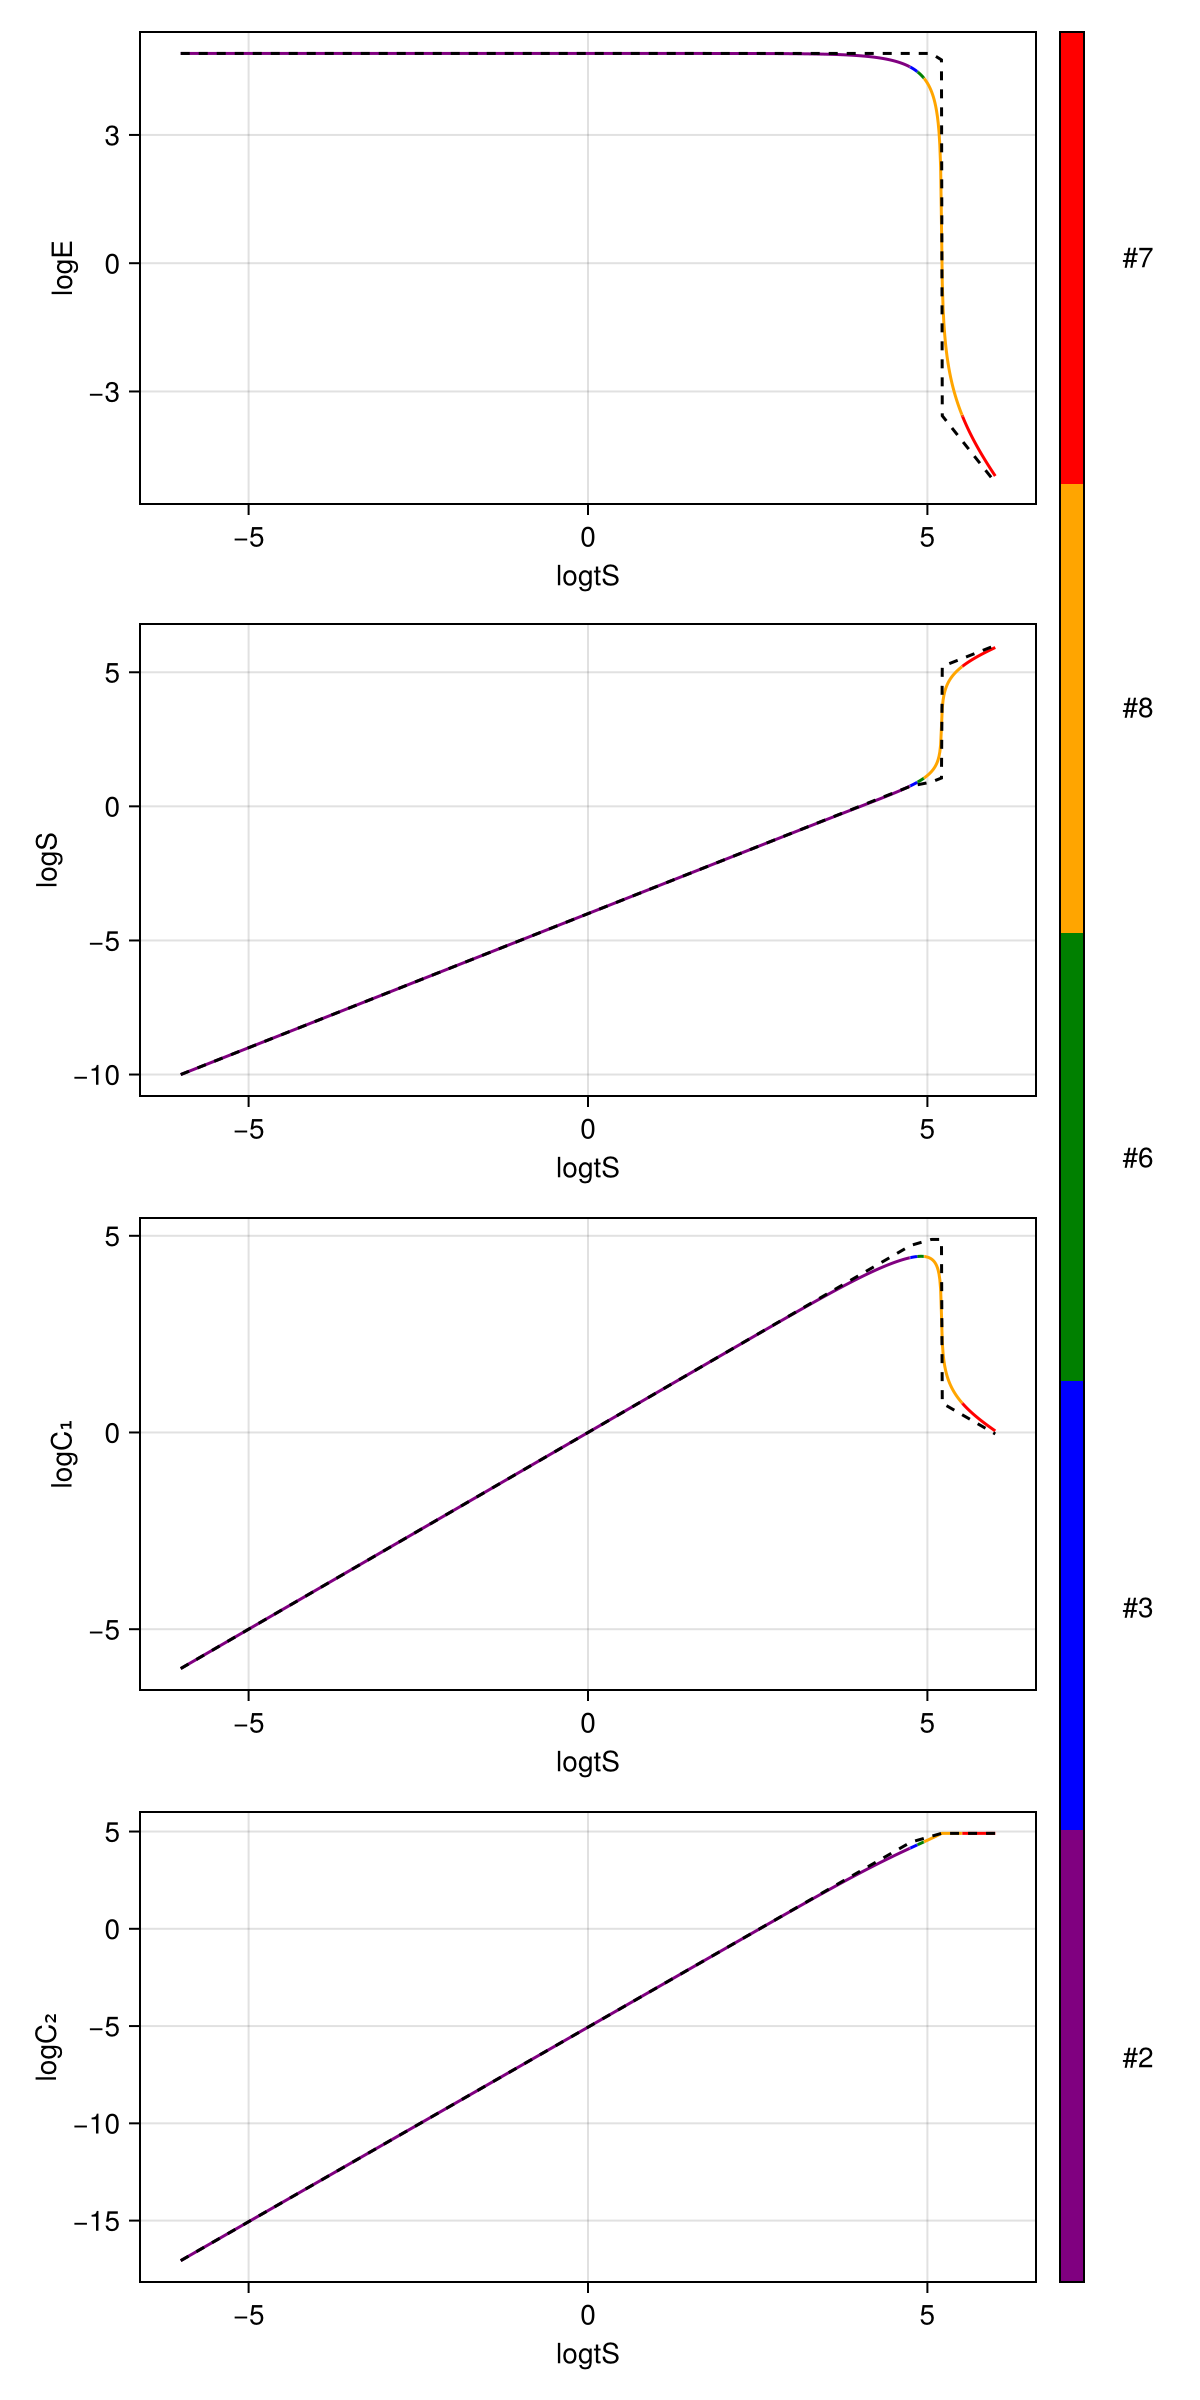

CairoMakie.Screen{IMAGE}


In [277]:
f = SISO_plot(grh1,5;add_archeatype_lines=true, start=-6,stop=6,size=(600,1200),rand_line=true,extend=4)
display(f)

In [159]:
(expr, bounds) = get_expression_for_path(grh2, 4, :C₂; log_space=false)
expr .|> display
println("----------")
bounds .|> display

(tE*(tS^2.0)) / (K_E*K_S)

0.5tS

tE

----------


(0.5K_E*K_S) / tE

2.0tE

2-element Vector{Nothing}:
 nothing
 nothing

In [153]:
show_condition_path(grh2, 2;log_space=false)

2-element Vector{Num}:
       K_E > tE
 (4.0K_E) > K_S

In [91]:
get_volume!(model2,1)[1] + get_volume!(model1,2)[1] + get_volume!(model1,4)[1]

0.7157697793958532

In [56]:
q_sym = [:tE, :tS]
K_sym = [:K₁, :K₂,:K₃]
# K_sym2 = [:K_S, :K_E]
x_sym = [:E, :S, :C₁, :C₂, :C₃]
# x_sym2 = [:E, :S, :C_S, :C₂]
N1 =     [0  2  -1  0  0;
           1  1  0  -1  0
          1  0  1   0  -1]

N2 =     [0  2  -1  0  0;
           1  1  0  -1  0
          0  1  0   1  -1]

model1 = Bnc(N=N1, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)
model2 = Bnc(N=N2, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

find_all_vertices!(model1)
find_all_vertices!(model2)
summary(model1)
summary(model2)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 11 vertices found and 10 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 11 vertices found and 10 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 5
Number of conserved quantities (d): 2
Number of reactions (r): 3
L matrix: [1 0 0 1 1; 0 1 2 1 2]
N matrix: [0 2 -1 0 0; 1 1 0 -1 0; 1 0 1 0 -1]
Direction of binding r

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 8
[ Info: All regimes converged after 4800000 samples.
[ Info: Total samples: 4800000, Elapsed: 0.99 s


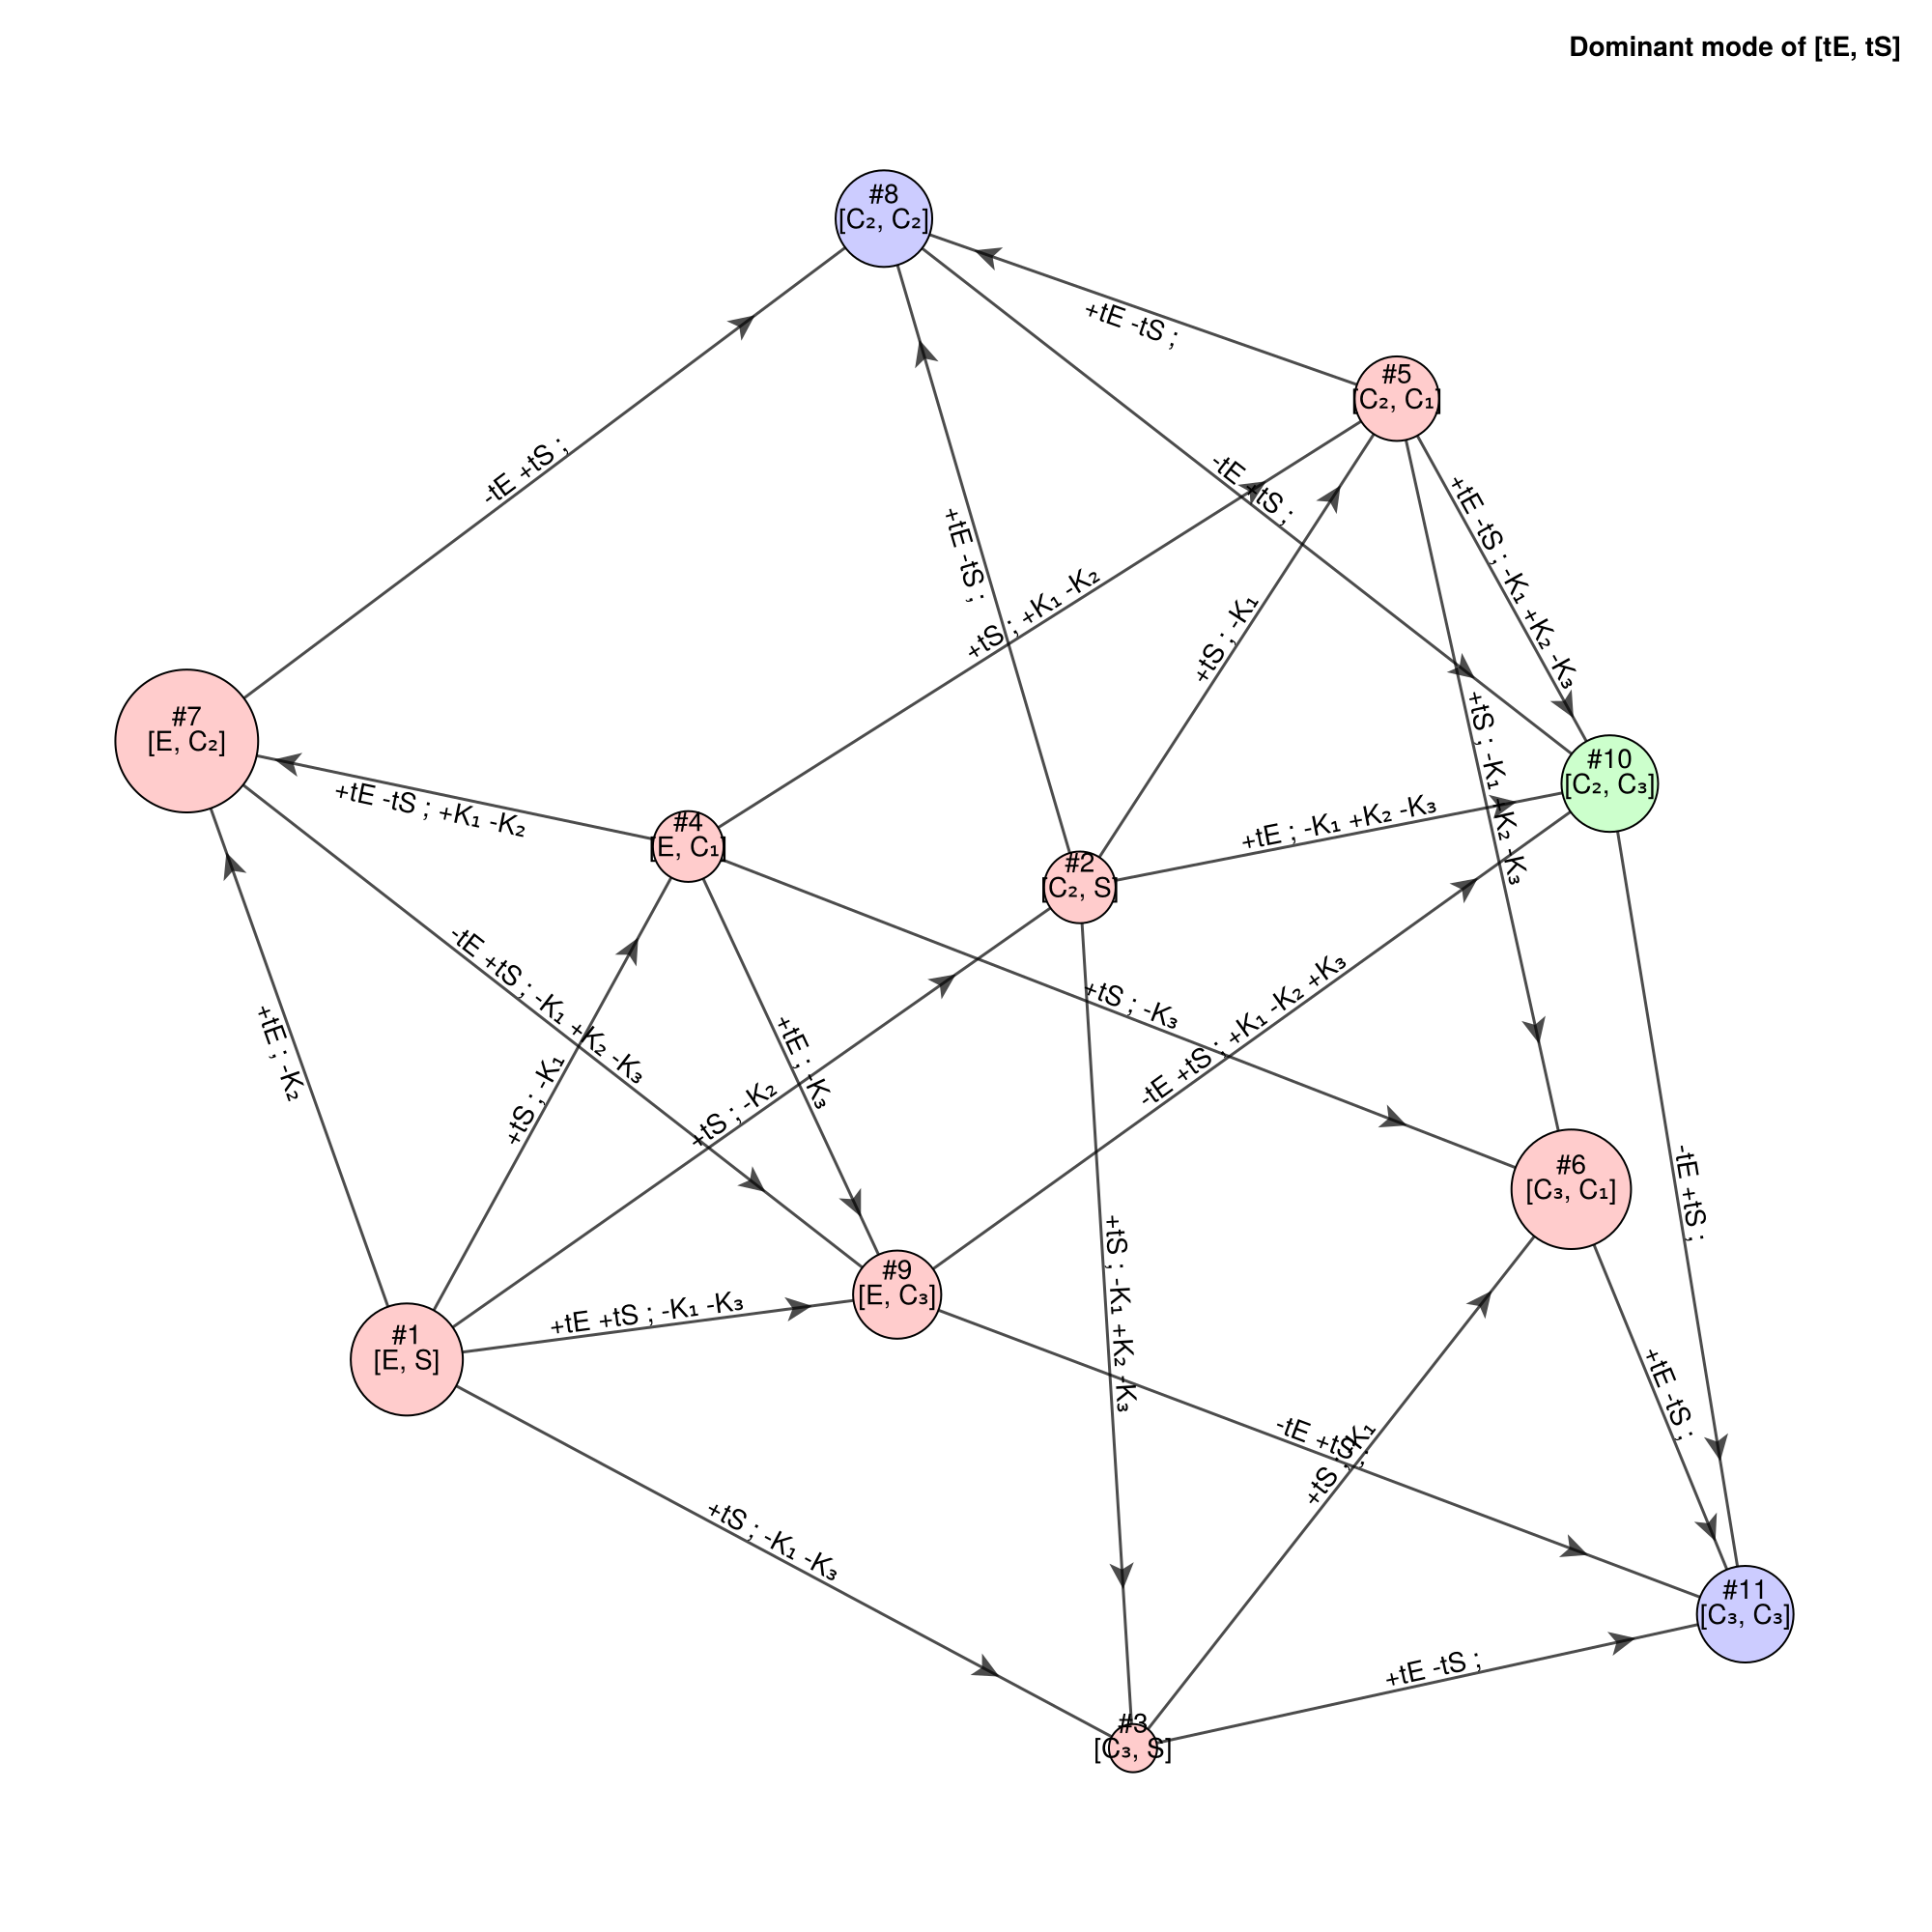

CairoMakie.Screen{IMAGE}


In [57]:
f,ax,p = draw_vertices_neighbor_graph(model1)
add_vertices_idx!(ax,p)
display(f)

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: Number of polyhedra to calc volume: 8


[ Info: All regimes converged after 4500000 samples.
[ Info: Total samples: 4500000, Elapsed: 0.76 s


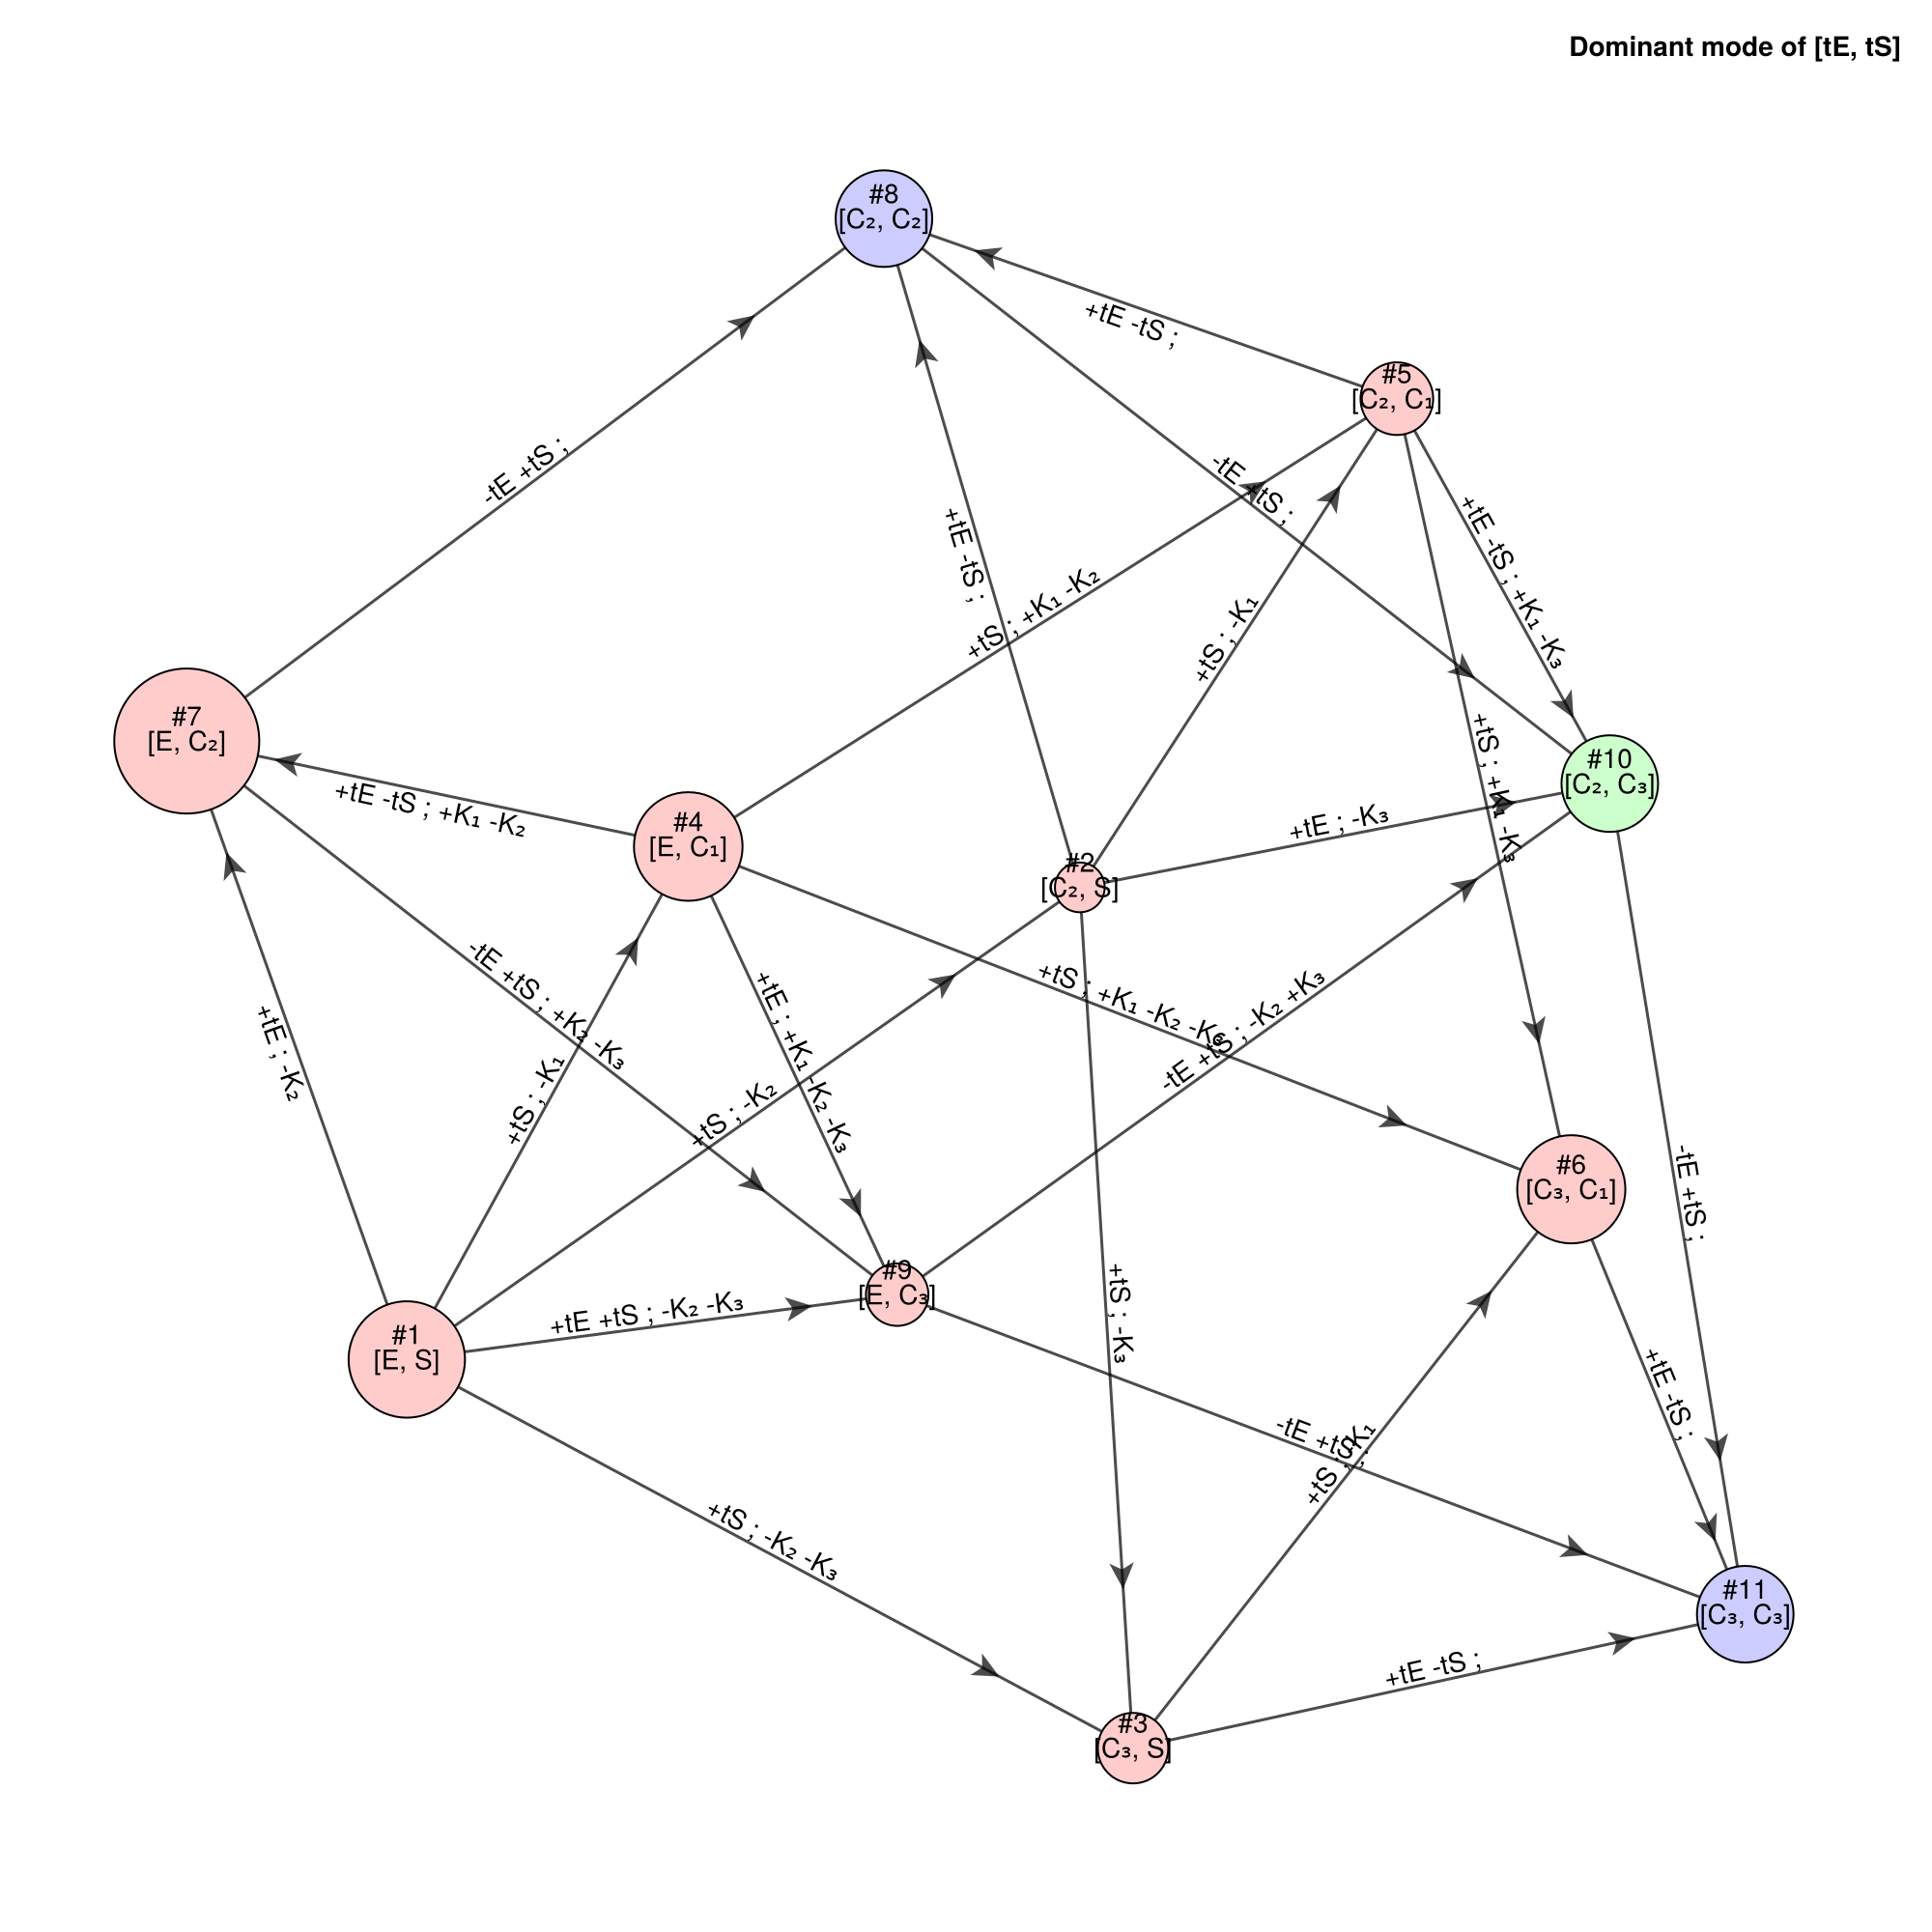

CairoMakie.Screen{IMAGE}


In [58]:
f,ax,p = draw_vertices_neighbor_graph(model2)
add_vertices_idx!(ax,p)
display(f)

In [59]:
grh1 = SISO_graph(model1, :tS)
grh2 = SISO_graph(model2, :tS)

[ Info: sources: [7, 1]
[ Info: sinks: [6]
[ Info: sources: [7, 1]
[ Info: sinks: [6]


SISO_graph{Int8}(Bnc{Int8}([0 2 … 0 0; 1 1 … -1 0; 0 1 … 1 -1], [1 0 … 1 1; 0 1 … 1 2], 3, 5, 2, Num[E, S, C₁, C₂, C₃], Num[tE, tS], Num[K₁, K₂, K₃], nothing, Vector{Int8}[[1, 2], [4, 2], [5, 2], [1, 3], [4, 3], [5, 3], [1, 4], [4, 4], [1, 5], [4, 5], [5, 5]], Dict{Vector{Int8}, Int64}([5, 5] => 11, [4, 2] => 2, [1, 4] => 7, [1, 2] => 1, [4, 3] => 5, [4, 5] => 10, [1, 3] => 4, [5, 2] => 3, [1, 5] => 9, [5, 3] => 6…), Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], Int8[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], VertexGraph{Int8}(SimpleGraph{Int64}(25, [[2, 3, 4, 7, 9], [1, 3, 5, 8, 10], [1, 2, 6, 11], [1, 5, 6, 7, 9], [2, 4, 6, 8, 10], [3, 4, 5, 11], [1, 4, 8, 9], [2, 5, 7, 10], [1, 4, 7, 10, 11], [2, 5, 8, 9, 11], [3, 6, 9, 10]]), Vector{VertexEdge{Int8}}[[VertexEdge{Int8}(2, 1, sparsevec(Int8[1, 4], Int8[-1, 1], 5), sparsevec(Int8[2, 4], [1.0, -1.0], 5)), VertexEdge{Int8}(3, 1, sparsevec(Int8[1, 5], Int8[-1, 1], 5), sparsevec(Int8[2, 4, 5], [2.0, -1.0, -1.0], 5)), VertexEdge{Int8}(4, 2, sparsevec(Int8

In [64]:
summary_path(grh1, :C₃; deduplicate=true,keep_singular=false,keep_nonasymptotic=false) |> render_path

Path[1, 5, 7, 8, 9, 10, 12, 13, 20, 21, 22, 23]:  2 → 1 → 0	 | Volume: 0.4479 ± 0.0022
Path[2, 4, 6, 11, 14, 19]:  2 → 1 → 0.5 → 0	 | Volume: 0.2498 ± 0.0012
Path[3, 17, 18]:  2 → 0	 | Volume: 0.1668 ± 0.0008
Path[15, 16]:  2 → 0.5 → 0	 | Volume: 0.1351 ± 0.0007


In [66]:
summary_path(grh2, :C₃; deduplicate=true,keep_singular=true,keep_nonasymptotic=true) |> render_path

Path[1, 5, 7, 8, 9, 10, 12, 20, 21, 22, 23]:  2 → 1 → 0	 | Volume: 0.4378 ± 0.0021
Path[2, 4, 6, 11, 19]:  2 → 1 → 0.5 → 0	 | Volume: 0.1564 ± 0.0008
Path[13, 17, 18]:  2 → Inf → 1 → 0	 | Volume: 0.1563 ± 0.0008
Path[15]:  2 → Inf → 0.5 → 0	 | Volume: 0.1042 ± 0.0005
Path[3]:  2 → 0	 | Volume: 0.104 ± 0.0005
Path[14, 16]:  2 → Inf → 1 → 0.5 → 0	 | Volume: 0.0416 ± 0.0002


In [224]:
a, b = get_expression_for_path(grh1, 3, :C₃; log_space=false)
a .|> display
println("----------")
b .|> display

grh1.rgm_volume[3]

(tE*(tS^2.0)) / (K₁*K₃)

tE

tE

----------


(K₁^0.5)*(K₃^0.5)

0.5K₁

0.10400751513487422

In [229]:
grh1.rgm_volume .- grh2.rgm_volume

23-element Vector{Float64}:
 -0.010305322358246778
  0.04192218366574525
 -0.000395713199917172
 -0.052049144767082035
 -0.041925149080153074
  0.0
  0.0
  0.0
  5.8124953482369124e-5
  0.06211948150516383
 -0.020893623035980434
 -0.010336504836587117
 -0.020880164553209506
  0.08315157876737841
  0.03187845502666872
  0.0
 -0.03129523070337783
 -0.020653206069935245
  0.0
  0.0
  0.0
 -0.031248371361147116
  0.021761519148947167

In [227]:
grh2.rgm_volume

23-element Vector{Float64}:
 0.04165298908921334
 0.04186993330216271
 0.10440322833479139
 0.08339035316988389
 0.17706655066943428
 0.0
 0.0
 0.0
 0.03116683354235474
 0.020853813783608687
 0.03125245847382877
 0.020738197406093013
 0.04175521120235721
 0.0416488224269928
 0.10400394371610241
 0.0
 0.04170910014044992
 0.07286132041782416
 0.0
 0.0
 0.0
 0.04163965577010761
 0.10386251553273851

In [225]:
a, b = get_expression_for_path(grh2, 3, :C₃; log_space=false)
a .|> display
println("----------")
b .|> display

grh2.rgm_volume[3]

(tE*(tS^2.0)) / (K₂*K₃)

tE

tE

----------


(K₂^0.5)*(K₃^0.5)

0.5K₁

0.10440322833479139

In [221]:
find_reaction_order_for_path(grh2,:C₃;keep_singular=true,keep_nonasymptotic=true)

23-element Vector{Vector{<:Real}}:
 [2.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, 1.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0]
 [2.0, Inf, 1.0, 0.5, 0.0]
 [2.0, Inf, 0.5, 0.0]
 [2.0, Inf, 1.0, 0.5, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0, 0.0]
 [2.0, Inf, 1.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.5, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 1.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0, 0.0]
 [2.0, 1.0, 0.0, 0.0]

In [134]:
x_syms[3]

C1

In [26]:
function hill(n)
    function hill_N(hill_n)
        N = zeros(Int, hill_n,hill_n+2)
        N[:,1] .= 1
        for i in 1:hill_n
            N[i,i+1] = 1
            N[i,i+2] = -1
        end
        return N
    end

    N = hill_N(n)
    x_syms = Num.(vcat([:S, :E], name_converter("C".*repr.(1:n))))
    q_syms = [:tS, :tE]
    K_syms = Num.(name_converter("K".* repr.(1:n)))
    model = Bnc(N=N, x_sym=x_syms, q_sym=q_syms, K_sym=K_syms)
    perm1 = [1,2]
    perm2 = [1,n+2]

    P1,P01 = _calc_P_and_P0(model, perm1)
    P2,P02 = _calc_P_and_P0(model, perm2)

    Cx1, C0x1 = _calc_C_C0_x(model, perm1)
    Cx2, C0x2 = _calc_C_C0_x(model, perm2)

    M1 = vcat(P1, N)
    M10 = vcat(P01, zeros(size(N,1)))
    M2 = vcat(P2, N)
    M20 = vcat(P02, zeros(size(N,1)))

    H1 = inv(Array(M1))
    H10 = -H1 * M10
    H2 = inv(Array(M2))
    H20 = -H2 * M20

    Cqk1 = Cx1 * H1
    C0qk1 = Cx1 * H10 + C0x1
    Cqk2 = Cx2 * H2
    C0qk2 = Cx2 * H20 + C0x2

    p = intersect(get_polyhedra(Cqk1,C0qk1), get_polyhedra(Cqk2,C0qk2))
    
    println("time to eliminate variables: ")
    p = eliminate(p, BitSet(1))
    detecthlinearity!(p)
    removevredundancy!(p)

    # obs_x = n+2

    # grh = SISO_graph(model, :tS)
    # pths = find_reaction_order_for_path(grh, obs_x; deduplicate=true, keep_singular=true, keep_nonasymptotic=true)
    # vals = ones(Float64, length(pths))
    # @show pths
    # pth_idx = findall(x-> x==[Float64(n),0.0], pths)
    # # print("$pth_idx")
    # @assert length(pth_idx) == 1 
    # idx = pth_idx[1]
    # println("Found path index: ", idx)
    # x = show_condition_qK(grh, idx; log_space=false)
    # display(x)

    # a,b = get_expression_for_path(grh, idx, obs_x; log_space=false)
    # display.(a)
    # println("-"^100)
    # display.(b)

    return calc_volume(p; rel_tol=0.001, asymptotic=true)
end

hill (generic function with 1 method)

In [166]:
[Float64(1),0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [12]:
r_idx = [(0.5005694866185488, 0.0004962326050384399),
 (0.25002611726417034, 0.0002491923804016435),
 (0.16663234614601632, 0.00016625217404512473),
 (0.1249886037394363, 0.00012497235191188643),
 (0.09997770337194163, 9.995124014498412e-5),
 (0.08327254375511496, 8.326239094679106e-5),
 (0.07147923145738, 7.552313465244108e-5),
 (0.06251352827741102, 0.00010047661841602086),
 (0.05562429452692954, 7.991146362741634e-5),
 (0.05001751579502254, 7.761496926009819e-5),
 (0.04544599819296912, 7.478041525255954e-5),
 (0.041677861394426786, 7.442459697838158e-5),
 (0.03845511815904901, 7.16093708694214e-5)]

 Val_hill = [[(0.33339177143099336, 0.0003329778770109728), (0.3333799532550712, 0.0003329749267916648)],
 [(0.26051117454422373, 0.00025937650640271454), (0.3020545798201327, 0.00030165214645362935)],
 [(0.23526864135636902, 0.00023514159712282828), (0.2892914536240215, 0.0002883365863126379)],
 [(0.2225540789479319, 0.00022188808977642035), (0.282096207864127, 0.00028175179778152114)],
 [(0.21525667332125986, 0.00021452631601930904), (0.27785958533432553, 0.0002776332673974609)],
 [(0.21012697334726177, 0.00020969281382550735), (0.2745494966724338, 0.0002738811366557137)],
 [(0.20672656260796168, 0.00020631307174479632), (0.2723237742338685, 0.0002718574558639627)],
 [(0.20408580911614524, 0.0002039585443436366), (0.27081046927136, 0.0002700749205737132)],
 [(0.20212040422975006, 0.00020188310262090773), (0.2696058938142354, 0.000268408745141363)],
 [(0.2004046201872282, 0.00019992939369124335), (0.26832789428179565, 0.0002680059900019602)],
 [(0.19912601005129307, 0.0001988054327045096), (0.2676426313765343, 0.00026652271664133183)],
 [(0.19815142048326206, 0.00019780191178313407), (0.2669145184328566, 0.00026629221233315524)],
 [(0.19710491487636922, 0.00019677789362782409), (0.26619187718530907, 0.00026606252879880435)]]

13-element Vector{Vector{Tuple{Float64, Float64}}}:
 [(0.33339177143099336, 0.0003329778770109728), (0.3333799532550712, 0.0003329749267916648)]
 [(0.26051117454422373, 0.00025937650640271454), (0.3020545798201327, 0.00030165214645362935)]
 [(0.23526864135636902, 0.00023514159712282828), (0.2892914536240215, 0.0002883365863126379)]
 [(0.2225540789479319, 0.00022188808977642035), (0.282096207864127, 0.00028175179778152114)]
 [(0.21525667332125986, 0.00021452631601930904), (0.27785958533432553, 0.0002776332673974609)]
 [(0.21012697334726177, 0.00020969281382550735), (0.2745494966724338, 0.0002738811366557137)]
 [(0.20672656260796168, 0.00020631307174479632), (0.2723237742338685, 0.0002718574558639627)]
 [(0.20408580911614524, 0.0002039585443436366), (0.27081046927136, 0.0002700749205737132)]
 [(0.20212040422975006, 0.00020188310262090773), (0.2696058938142354, 0.000268408745141363)]
 [(0.2004046201872282, 0.00019992939369124335), (0.26832789428179565, 0.0002680059900019602)]
 [(0.1991260

In [27]:
r_idx = [hill(n) for n in 1:13]

time to eliminate variables: 


[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: All regimes converged after 3900000 samples.
[ Info: Total samples: 3900000, Elapsed: 0.51 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: All regimes converged after 11600000 samples.
[ Info: Total samples: 11600000, Elapsed: 1.74 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: All regimes converged after 19300000 samples.
[ Info: Total samples: 19300000, Elapsed: 3.82 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: All regimes converged after 26900000 samples.
[ Info: Total samples: 26900000, Elapsed: 8.64 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: All regimes converged after 34600000 samples.
[ Info: Total samples: 34600000, Elapsed: 17.26 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: All regimes converged after 42300000 samples.
[ Info: Total samples: 42300000, Elapsed: 28.04 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: Reached time limit (40.07 s). Stopping.
[ Info: Total samples: 44700000, Elapsed: 40.07 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: Reached time limit (40.03 s). Stopping.
[ Info: Total samples: 22300000, Elapsed: 40.03 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: Reached time limit (40.21 s). Stopping.
[ Info: Total samples: 31600000, Elapsed: 40.21 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: Reached time limit (40.04 s). Stopping.
[ Info: Total samples: 30300000, Elapsed: 40.04 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: Reached time limit (40.1 s). Stopping.
[ Info: Total samples: 29800000, Elapsed: 40.1 s
[ Info: Number of polyhedra to calc volume: 1


time to eliminate variables: 


[ Info: Reached time limit (40.15 s). Stopping.
[ Info: Total samples: 27700000, Elapsed: 40.15 s
[ Info: Number of polyhedra to calc volume: 1
[ Info: Reached time limit (40.11 s). Stopping.
[ Info: Total samples: 27700000, Elapsed: 40.11 s


13-element Vector{Tuple{Float64, Float64}}:
 (0.5005694866185488, 0.0004962326050384399)
 (0.25002611726417034, 0.0002491923804016435)
 (0.16663234614601632, 0.00016625217404512473)
 (0.1249886037394363, 0.00012497235191188643)
 (0.09997770337194163, 9.995124014498412e-5)
 (0.08327254375511496, 8.326239094679106e-5)
 (0.07147923145738, 7.552313465244108e-5)
 (0.06251352827741102, 0.00010047661841602086)
 (0.05562429452692954, 7.991146362741634e-5)
 (0.05001751579502254, 7.761496926009819e-5)
 (0.04544599819296912, 7.478041525255954e-5)
 (0.041677861394426786, 7.442459697838158e-5)
 (0.03845511815904901, 7.16093708694214e-5)

In [40]:
Val_hill = [hill_val(n) for n in 1:13]

[ Info: Number of polyhedra to calc volume: 2
[ Info: All regimes converged after 7700000 samples.
[ Info: Total samples: 7700000, Elapsed: 1.1 s
[ Info: Number of polyhedra to calc volume: 2
[ Info: All regimes converged after 11000000 samples.
[ Info: Total samples: 11000000, Elapsed: 1.44 s
[ Info: Number of polyhedra to calc volume: 2
[ Info: All regimes converged after 12500000 samples.
[ Info: Total samples: 12500000, Elapsed: 1.84 s
[ Info: Number of polyhedra to calc volume: 2
[ Info: All regimes converged after 13500000 samples.
[ Info: Total samples: 13500000, Elapsed: 2.14 s
[ Info: Number of polyhedra to calc volume: 2
[ Info: All regimes converged after 14100000 samples.
[ Info: Total samples: 14100000, Elapsed: 2.46 s
[ Info: Number of polyhedra to calc volume: 2
[ Info: All regimes converged after 14500000 samples.
[ Info: Total samples: 14500000, Elapsed: 2.58 s
[ Info: Number of polyhedra to calc volume: 2
[ Info: All regimes converged after 14800000 samples.
[ Info: T

13-element Vector{Vector{Tuple{Float64, Float64}}}:
 [(0.33339177143099336, 0.0003329778770109728), (0.3333799532550712, 0.0003329749267916648)]
 [(0.26051117454422373, 0.00025937650640271454), (0.3020545798201327, 0.00030165214645362935)]
 [(0.23526864135636902, 0.00023514159712282828), (0.2892914536240215, 0.0002883365863126379)]
 [(0.2225540789479319, 0.00022188808977642035), (0.282096207864127, 0.00028175179778152114)]
 [(0.21525667332125986, 0.00021452631601930904), (0.27785958533432553, 0.0002776332673974609)]
 [(0.21012697334726177, 0.00020969281382550735), (0.2745494966724338, 0.0002738811366557137)]
 [(0.20672656260796168, 0.00020631307174479632), (0.2723237742338685, 0.0002718574558639627)]
 [(0.20408580911614524, 0.0002039585443436366), (0.27081046927136, 0.0002700749205737132)]
 [(0.20212040422975006, 0.00020188310262090773), (0.2696058938142354, 0.000268408745141363)]
 [(0.2004046201872282, 0.00019992939369124335), (0.26832789428179565, 0.0002680059900019602)]
 [(0.1991260

In [13]:
begin 
    catgory = repeat(collect(1:13),inner=2)
    vals = vcat(Val_hill...)
    hgt = getindex.(vals, 1)
    grp = repeat([1,2],13)
    vl = (catgory, hgt, grp)

    tot_hgt = map(Val_hill) do v
        sum(getindex.(v,1))
    end
    tot_errs = map(Val_hill) do v
        sum(getindex.(v,2))
    end
end



13-element Vector{Float64}:
 0.0006659528038026376
 0.000561028652856344
 0.0005234781834354662
 0.0005036398875579415
 0.0004921595834167699
 0.00048357395048122107
 0.000478170527608759
 0.0004740334649173498
 0.0004702918477622707
 0.00046793538369320356
 0.00046532814934584145
 0.0004640941241162893
 0.00046284042242662846

In [ ]:
# f = open("r_idx.txt", "w")
# println(f, "Hill function realizability indices:")
# for r in Val_hill
#     println(f, r)
# end
# close(f)

In [14]:
[label => (; color = i)
        for (i, label) in enumerate(["red", "blue", "green", "purple", "orange"])]

5-element Vector{Pair{String, @NamedTuple{color::Int64}}}:
    "red" => (color = 1,)
   "blue" => (color = 2,)
  "green" => (color = 3,)
 "purple" => (color = 4,)
 "orange" => (color = 5,)

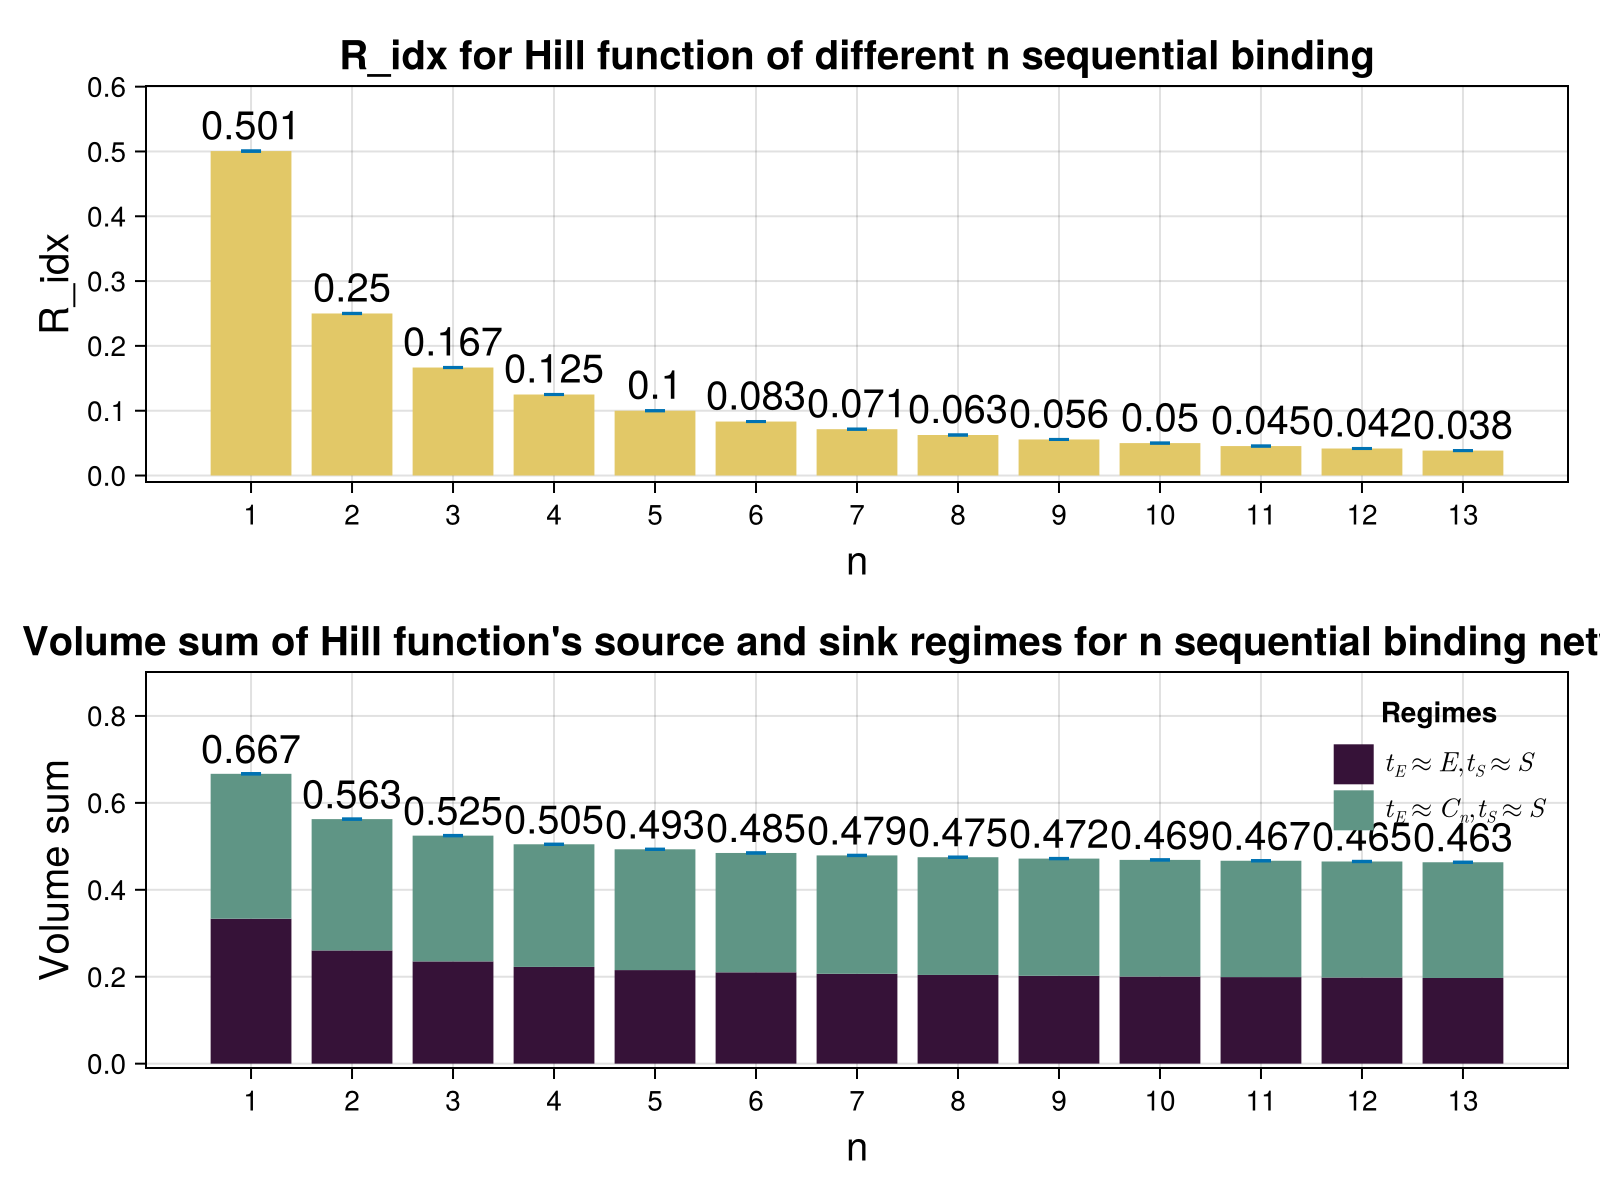

CairoMakie.Screen{IMAGE}


In [ ]:
F=Figure(size=(800,600))

txtsize = 20

ax = Axis(F[1,1]; 
    xlabel="n", 
    ylabel="R_idx", 
    xticks=1:13, 
    title="R_idx for Hill function of different n sequential binding",
    titlesize = txtsize,
    xlabelsize = txtsize,
    ylabelsize = txtsize
)
barplot!(ax, 1:13, getindex.(r_idx, 1),color = "#E2C867")
errorbars!(ax, 1:13, getindex.(r_idx, 1), getindex.(r_idx, 2),getindex.(r_idx, 2),whiskerwidth = 10)
text!(ax, 1:13, getindex.(r_idx, 1) .+ 0.005; text=string.(round.(getindex.(r_idx, 1), digits=3)), fontsize=txtsize, align = (:center, :bottom))
ylims!(ax, -0.01,0.601)


ax2 = Axis(F[2,1]; 
    xlabel="n", 
    ylabel="Volume sum", 
    xticks=1:13, 
    title="Volume sum of Hill function's source and sink regimes",
    subtitile = "for n sequential binding network"
    titlesize = txtsize,
    xlabelsize = txtsize,
    ylabelsize = txtsize
    )    
labels = [L"t_E\approx E, t_S \approx S", L"t_E\approx C_n, t_S \approx S"]
bp = barplot!(ax2, vl[1],vl[2]; stack=vl[3], color=vl[3],colorrange=(1,2),colormap = :glasgowS,
    label = [label => (;color = i) for (i, label) in enumerate(labels)])

errorbars!(ax2, 1:13, tot_hgt, tot_errs, tot_errs; whiskerwidth=10)
text!(ax2, 1:13, tot_hgt .+ 0.005; text=string.(round.(tot_hgt, digits=3)), fontsize=txtsize, align = (:center, :bottom))
ylims!(ax2, -0.01,0.901)

axislegend(ax2,"Regimes";framevisible = false, backgroundcolor = :white)

display(F)

In [16]:
save("/home/joker/paper_writing/PAPER_WORK/ifac2026_R_idx/figures/Hill_sequential_n.pdf", F)

CairoMakie.Screen{PDF}


In [28]:
delta = sqrt.(1 ./ (tot_hgt[1:end-1].- tot_hgt[2:end]))

12-element Vector{Float64}:
  3.097802308307614
  5.129509802731714
  7.087065754330354
  9.311282354804389
 10.885144904565452
 13.331990510599315
 15.515425784066748
 17.761175899813544
 18.276364010805334
 22.565413479846587
 24.234307359193036
 23.774864897465072

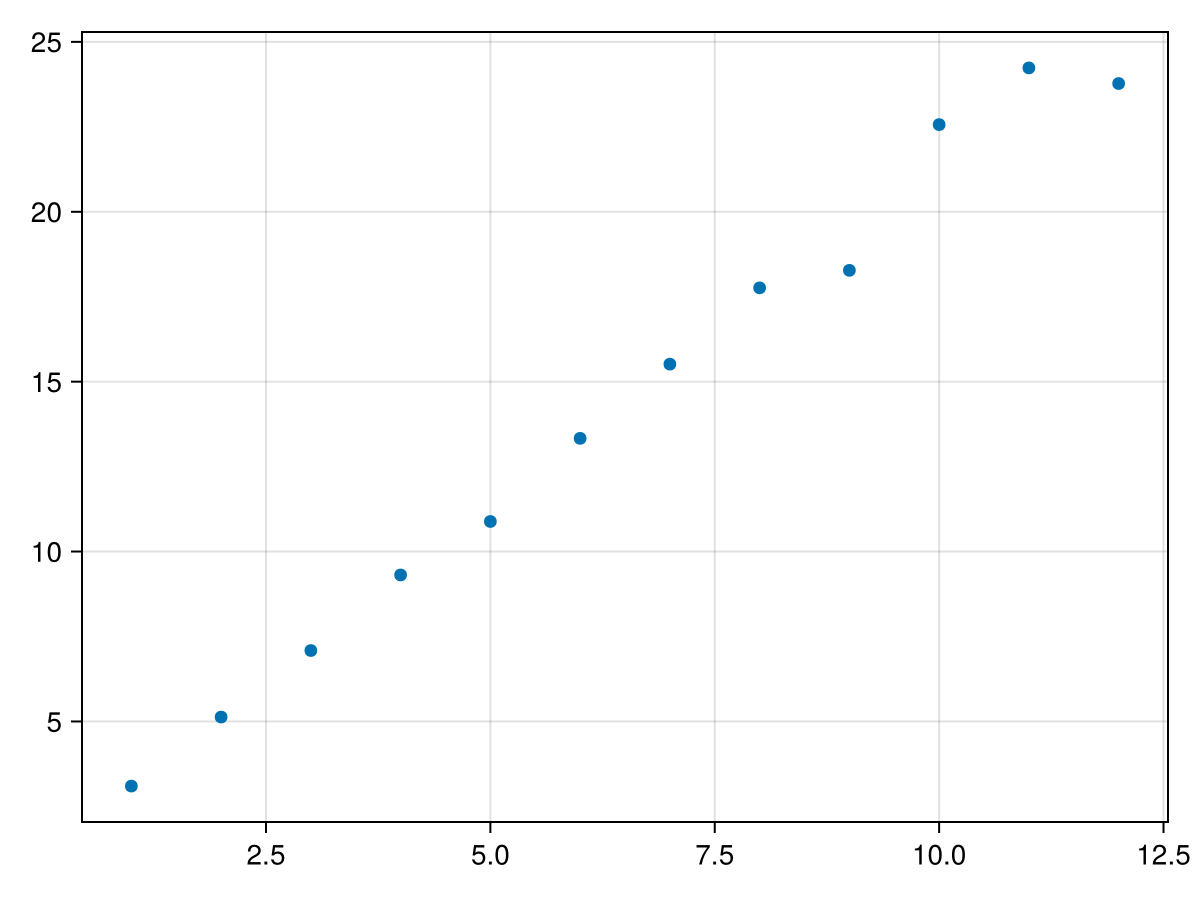

In [23]:
plot(sqrt.(-1 ./ delta))

In [81]:
hill(1)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 4 vertices found and 4 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 3
Number of conserved quantities (d): 2
Number of reactions (r): 1
L matrix: [1 0 1; 0 1 1]
N matrix: [1 1 -1]
Direction of binding reactions: backward
Catalysis involved: No
Regimes constructed: Yes
Number of regimes: 4
  - Invertible + Asymptotic: 3
  - Singular +  Asymptotic: 1
  - Invertible +  Non-Asymptotic: 0
  - Singular +  Non-Asymptotic: 0
-----------------------------------------------


In [84]:
function hill(n)
    function hill_N(hill_n)
        N = zeros(Int, hill_n,hill_n+2)
        N[:,1] .= 1
        for i in 1:hill_n
            N[i,i+1] = 1
            N[i,i+2] = -1
        end
        return N
    end

    N = hill_N(n)
    x_syms = Num.(vcat([:S, :E], name_converter("C".*repr.(1:n))))
    q_syms = [:tS, :tE]
    K_syms = Num.(name_converter("K".* repr.(1:n)))
    model = Bnc(N=N, x_sym=x_syms, q_sym=q_syms, K_sym=K_syms)
    find_all_vertices!(model)
    return (length(get_vertices(model,singular=false,asymptotic=true)), 
            length(get_vertices(model,singular=true,asymptotic=true)),
            length(get_vertices(model,singular=false,asymptotic=false)),
            length(get_vertices(model,singular=true,asymptotic=false))
    )
end

hill (generic function with 1 method)

In [85]:
rgm_num = [hill(n) for n in 1:13]

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 4 vertices found and 4 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 8 vertices found and 7 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 13 vertices found and 10 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------


13-element Vector{NTuple{4, Int64}}:
 (3, 1, 0, 0)
 (5, 2, 1, 0)
 (7, 3, 3, 0)
 (9, 4, 6, 0)
 (11, 5, 10, 0)
 (13, 6, 15, 0)
 (15, 7, 21, 0)
 (17, 8, 28, 0)
 (19, 9, 36, 0)
 (21, 10, 45, 0)
 (23, 11, 55, 0)
 (25, 12, 66, 0)
 (27, 13, 78, 0)

In [39]:
function hill_val(n)
    function hill_N(hill_n)
        N = zeros(Int, hill_n,hill_n+2)
        N[:,1] .= 1
        for i in 1:hill_n
            N[i,i+1] = 1
            N[i,i+2] = -1
        end
        return N
    end

    N = hill_N(n)
    x_syms = Num.(vcat([:S, :E], name_converter("C".*repr.(1:n))))
    q_syms = [:tS, :tE]
    K_syms = Num.(name_converter("K".* repr.(1:n)))
    model = Bnc(N=N, x_sym=x_syms, q_sym=q_syms, K_sym=K_syms)
    perm1 = [1,2]
    perm2 = [1,n+2]

    P1,P01 = _calc_P_and_P0(model, perm1)
    P2,P02 = _calc_P_and_P0(model, perm2)

    Cx1, C0x1 = _calc_C_C0_x(model, perm1)
    Cx2, C0x2 = _calc_C_C0_x(model, perm2)

    M1 = vcat(P1, N)
    M10 = vcat(P01, zeros(size(N,1)))
    M2 = vcat(P2, N)
    M20 = vcat(P02, zeros(size(N,1)))

    H1 = inv(Array(M1))
    H10 = -H1 * M10
    H2 = inv(Array(M2))
    H20 = -H2 * M20

    Cqk1 = Cx1 * H1
    C0qk1 = Cx1 * H10 + C0x1
    Cqk2 = Cx2 * H2
    C0qk2 = Cx2 * H20 + C0x2

    p1 = get_polyhedra(Cqk1,C0qk1)
    p2 = get_polyhedra(Cqk2,C0qk2)
    p = [p1,p2]
    
    # println("time to eliminate variables: ")
    # p = eliminate(p, BitSet(1))
    # detecthlinearity!(p)
    # removevredundancy!(p)

    # obs_x = n+2

    # grh = SISO_graph(model, :tS)
    # pths = find_reaction_order_for_path(grh, obs_x; deduplicate=true, keep_singular=true, keep_nonasymptotic=true)
    # vals = ones(Float64, length(pths))
    # @show pths
    # pth_idx = findall(x-> x==[Float64(n),0.0], pths)
    # # print("$pth_idx")
    # @assert length(pth_idx) == 1 
    # idx = pth_idx[1]
    # println("Found path index: ", idx)
    # x = show_condition_qK(grh, idx; log_space=false)
    # display(x)

    # a,b = get_expression_for_path(grh, idx, obs_x; log_space=false)
    # display.(a)
    # println("-"^100)
    # display.(b)

    return calc_volume(p; rel_tol=0.001, asymptotic=true)
end

hill_val (generic function with 1 method)

In [9]:
f(lgSt,lgEt=5,lgK=1)=begin
    Et = exp10(lgEt)
    St = exp10(lgSt)
    K = exp10(lgK)
    return log10(1/maximum([1/Et, St/(K*Et)]))
end

f (generic function with 3 methods)

In [10]:
using CairoMakie

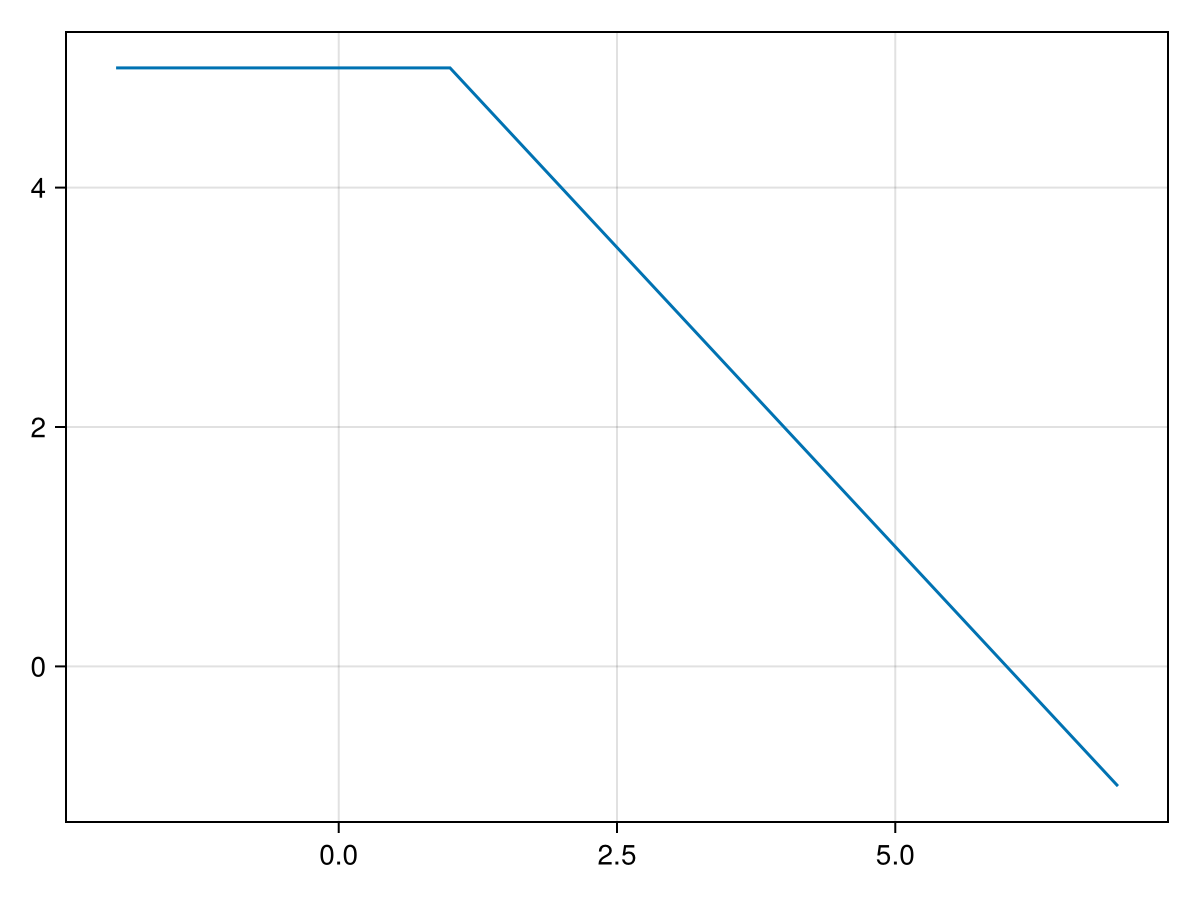

In [11]:
lgSt = range(-2,7,1000)
lgE = f.(lgSt)

F = lines(lgSt,lgE)